## IMPORT PACKAGES

In [ ]:
# import package
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
import statistics
from scipy.stats import chi2
from matplotlib import patches
from mpl_toolkits import mplot3d
warnings.filterwarnings('ignore')

# Package untuk visualisasi
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

## READ DATASET

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df=pd.read_csv('/content/gdrive/MyDrive/Final Project/Data_Transaksi_PT_456.csv',encoding='ISO-8859-1')
df.head()

,Nomor Transaksi,Status Transaksi,Order At,Date,Merchant ID,Kategori,SKU Product Name,Nomor Customer,Register Date,Amount,Selling Price,Quantity,Total Amount,Total Selling Price
0,1.640970e+12,Reguler,2022-01-01 00:02:30,2022-01-01,T675a,App & Lifestyle,Voucher Digital T675a Rp. 500.000,rpbvpbvu,2021-10-16,500000,500000,1,500000,500000
1,1.640970e+12,Reguler,2022-01-01 00:07:05,2022-01-01,T675a,App & Lifestyle,Voucher Digital T675a Rp. 500.000,rpbvpbvu,2021-10-16,500000,500000,1,500000,500000
2,1.640970e+12,Reguler,2022-01-01 00:09:00,2022-01-01,T675a,App & Lifestyle,Voucher Digital T675a Rp. 1.000.000,ipbvpbve,2021-08-02,1000000,1000000,1,1000000,1000000
3,1.640970e+12,Reguler,2022-01-01 00:11:50,2022-01-01,T672672672a,Gold & Investment,Voucher Digital T672672672a Rp. 100.000,rpbvpbvn,2020-09-11,100000,99000,1,100000,99000
4,1.640970e+12,Reguler,2022-01-01 00:11:50,2022-01-01,T672672672a,Gold & Investment,Voucher Digital T672672672a Rp. 1.000.000,rpbvpbvn,2020-09-11,1000000,990000,2,2000000,1980000


## PROBLEM STATEMENT

PT 456 adalah platform yang menyediakan penjualan voucher digital dan gift card dalam satu platform. Saat ini PT 456 mulai beralih ke bisnis digital. PT 456 menyediakan voucher, gift card, reward untuk memberikan kemudahan kepada pelanggan dalam berbelanja.

Perusahaan ingin mengetahui analisis untuk mendapatkan insight terkait dengan segmentasi customer pada aplikasi yang telah mereka kembangkan. Analisis ini diharapkan dapat membantu PT 456 dalam mengembangkan strategi penjualan produk bagi platform mereka.

Variabel yang ada pada data antara lain, yaitu:
* Nomor transaksi = Nomor transaksi yang dibuat
* Status transaksi = Status transaksi yang dipilih (Reguler atau Promo)
* Order At = Timestamp masuknya transaksi
* Date = Tanggal transaksi dibuat
* Merchant ID = ID Merchant yang dipilih oleh cust pada transaksi
* Kategori = Kategori merchant yang dipilih oleh cust pada transaksi
* SKU Product Name = Nama product
* Nomor Customer = ID/Nomor customer yang membuat transaksi
* Register Date= Tanggal registrasi akun oleh customer
* Amount = Harga barang
* Selling price = Harga jual
* Quantity = Total barang yang dibeli
* Total Amount = Total harga barang
* Total Selling Price = Total harga jual


## DATA PRE-PROCESSING

### Analisis Deskriptif

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654321 entries, 0 to 654320
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Nomor Transaksi      654321 non-null  float64
 1   Status Transaksi     654321 non-null  object 
 2   Order At             654321 non-null  object 
 3   Date                 654321 non-null  object 
 4   Merchant ID          654321 non-null  object 
 5   Kategori             654321 non-null  object 
 6   SKU Product Name     654321 non-null  object 
 7   Nomor Customer       654321 non-null  object 
 8   Register Date        654321 non-null  object 
 9   Amount               654321 non-null  int64  
 10  Selling Price        654321 non-null  int64  
 11  Quantity             654321 non-null  float64
 12  Total Amount         654321 non-null  int64  
 13  Total Selling Price  654321 non-null  int64  
 14  Nominal              654321 non-null  object 
 15  month            

In [ ]:
df.describe()

,Nomor Transaksi,Amount,Selling Price,Quantity,Total Amount,Total Selling Price
count,6.545230e+05,6.545230e+05,6.545230e+05,654523.000000,6.545230e+05,6.545230e+05
mean,1.656813e+12,2.175059e+05,1.998825e+05,2.694240,6.450017e+05,6.041757e+05
std,9.306590e+09,4.821338e+05,4.630060e+05,11.526596,2.812942e+06,2.721511e+06
min,1.640970e+12,5.000000e+03,2.500000e+02,1.000000,5.000000e+03,0.000000e+00
25%,1.648640e+12,5.000000e+04,2.700000e+04,1.000000,5.000000e+04,3.000000e+04
50%,1.657160e+12,1.000000e+05,8.700000e+04,1.000000,1.000000e+05,9.300000e+04
75%,1.664890e+12,2.500000e+05,2.250000e+05,2.000000,4.000000e+05,3.860000e+05
max,1.672510e+12,1.000000e+07,1.000000e+07,2100.000000,2.100000e+08,2.026500e+08


In [ ]:
df.shape

(654523, 14)

In [ ]:
#Membuat variabel kategorik baru
def get_Nominal(Amount):
    if Amount <= 50000:
        return 'Low'
    elif 50000 < Amount <= 150000:
        return 'Medium'
    elif 150000 < Amount <= 300000:
        return 'Medium High'
    elif 300000 < Amount <= 500000:
        return 'High'
    else:
        return 'High End'

### Missing Value & Duplicate

In [ ]:
df.isnull().sum()

Nomor Transaksi          0
Status Transaksi         0
Order At                 0
Date                     0
Merchant ID              0
Kategori                 0
SKU Product Name         0
Nomor Customer           0
Register Date          114
Amount                   0
Selling Price            0
Quantity                 0
Total Amount             0
Total Selling Price      0
dtype: int64

In [ ]:
#Duplicate check
duplicate=df[df.duplicated(keep=False)]
duplicate


,Nomor Transaksi,Status Transaksi,Order At,Date,Merchant ID,Kategori,SKU Product Name,Nomor Customer,Register Date,Amount,Selling Price,Quantity,Total Amount,Total Selling Price
54019,1.643190e+12,Reguler,2022-01-26 16:30:55,2022-01-26,G675P,Retail & Dept Store,Voucher Digital G675P Rp. 100.000,jpbvpbv.,2022-01-07,100000,87000,1,100000,87000
54020,1.643190e+12,Reguler,2022-01-26 16:30:55,2022-01-26,G675P,Retail & Dept Store,Voucher Digital G675P Rp. 100.000,jpbvpbv.,2022-01-07,100000,87000,1,100000,87000
60658,1.643440e+12,Reguler,2022-01-29 15:12:22,2022-01-29,M675p,Retail & Dept Store,Voucher Digital M675p Rp. 50.000,mpbvpbvp,2019-04-28,50000,48250,1,50000,48250
60661,1.643440e+12,Reguler,2022-01-29 15:12:22,2022-01-29,M675p,Retail & Dept Store,Voucher Digital M675p Rp. 50.000,mpbvpbvp,2019-04-28,50000,48250,1,50000,48250
84148,1.644470e+12,Reguler,2022-02-10 13:11:42,2022-02-10,U675675675675675r,App & Lifestyle,Voucher Digital U675675675675675r Rp. 5.000,apbvpbvn,2022-02-10,5000,5000,1,5000,5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645720,1.672140e+12,Promo,2022-12-27 17:55:36,2022-12-27,G672672d,App & Lifestyle,Voucher Digital G672672d Rp. 50.000 - Promo,wpbvpbv0,2020-09-26,50000,25000,1,50000,25000
646161,1.672150e+12,Promo,2022-12-27 20:20:43,2022-12-27,G672672d,App & Lifestyle,Voucher Digital G672672d Rp. 50.000 - Promo,fpbvpbvh,2021-12-09,50000,25000,1,50000,25000
646162,1.672150e+12,Promo,2022-12-27 20:20:43,2022-12-27,G672672d,App & Lifestyle,Voucher Digital G672672d Rp. 50.000 - Promo,fpbvpbvh,2021-12-09,50000,25000,1,50000,25000
647960,1.672230e+12,Reguler,2022-12-28 20:22:08,2022-12-28,B675675p,Food & Beverage,Voucher Digital B675675p Rp. 200.000,tpbvpbvd,2021-05-06,200000,180000,1,200000,180000


In [ ]:
df.drop_duplicates(keep='first', inplace=True)

In [ ]:
#Membuat variabel kategorik baru
def get_Nominal(Amount):
    if Amount <= 50000:
        return 'Low'
    elif 50000 < Amount <= 150000:
        return 'Medium'
    elif 150000 < Amount <= 300000:
        return 'Medium High'
    elif 300000 < Amount <= 500000:
        return 'High'
    else:
        return 'High End'

In [ ]:
df['Nominal'] = df['Amount'].apply(get_Nominal)
df

,Nomor Transaksi,Status Transaksi,Order At,Date,Merchant ID,Kategori,SKU Product Name,Nomor Customer,Register Date,Amount,Selling Price,Quantity,Total Amount,Total Selling Price,Nominal
0,1.640970e+12,Reguler,2022-01-01 00:02:30,2022-01-01,T675a,App & Lifestyle,Voucher Digital T675a Rp. 500.000,rpbvpbvu,2021-10-16,500000,500000,1,500000,500000,High
1,1.640970e+12,Reguler,2022-01-01 00:07:05,2022-01-01,T675a,App & Lifestyle,Voucher Digital T675a Rp. 500.000,rpbvpbvu,2021-10-16,500000,500000,1,500000,500000,High
2,1.640970e+12,Reguler,2022-01-01 00:09:00,2022-01-01,T675a,App & Lifestyle,Voucher Digital T675a Rp. 1.000.000,ipbvpbve,2021-08-02,1000000,1000000,1,1000000,1000000,High End
3,1.640970e+12,Reguler,2022-01-01 00:11:50,2022-01-01,T672672672a,Gold & Investment,Voucher Digital T672672672a Rp. 100.000,rpbvpbvn,2020-09-11,100000,99000,1,100000,99000,Medium
4,1.640970e+12,Reguler,2022-01-01 00:11:50,2022-01-01,T672672672a,Gold & Investment,Voucher Digital T672672672a Rp. 1.000.000,rpbvpbvn,2020-09-11,1000000,990000,2,2000000,1980000,High End
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654518,1.672510e+12,Promo,2022-12-31 23:52:14,2022-12-31,A675675675675675s,Food & Beverage,Voucher Digital A675675675675675s Rp. 50.000 -...,ipbvpbv1,2020-10-28,50000,30000,1,50000,30000,Low
654519,1.672510e+12,Promo,2022-12-31 23:52:14,2022-12-31,I675675675675675.,Food & Beverage,Voucher Digital I675675675675675. Rp. 50.000 -...,ipbvpbv1,2020-10-28,50000,33000,1,50000,33000,Low
654520,1.672510e+12,Reguler,2022-12-31 23:54:06,2022-12-31,U675675675675675r,App & Lifestyle,Voucher Digital U675675675675675r Rp. 5.000,apbvpbve,2022-07-30,5000,5000,1,5000,5000,Low
654521,1.672510e+12,Reguler,2022-12-31 23:54:24,2022-12-31,C675675675s,Activity & Entertainment,Voucher Digital C675675675s Rp 200.000,dpbvpbv.,2019-08-30,200000,170000,1,200000,170000,Medium High


In [ ]:
#Mengelompokkan kategori merchant agar lebih teratur
df['Kategori'] = df['Kategori'].replace('Department Store', 'Retail & Dept Store')
df['Kategori'] = df['Kategori'].replace('UMKM', 'Retail & Dept Store')
df['Kategori'] = df['Kategori'].replace('E-Commerce', 'Retail & Dept Store')
df['Kategori'] = df['Kategori'].replace('Lain - lain', 'Lain - Lain')
df['Kategori'] = df['Kategori'].replace('[New] Singapore', 'Lain - Lain')
df['Kategori'] = df['Kategori'].replace('Healthcare', 'App & Lifestyle')
df['Kategori'] = df['Kategori'].replace('Beauty & Relaxation', 'App & Lifestyle')

In [ ]:
unique_kategori=df['Kategori'].unique()
print(unique_kategori)

['App & Lifestyle' 'Gold & Investment' 'Retail & Dept Store'
 'Food & Beverage' 'Hotel & Travel' 'Activity & Entertainment'
 'Lain - Lain']


### Outlier Check and Handling

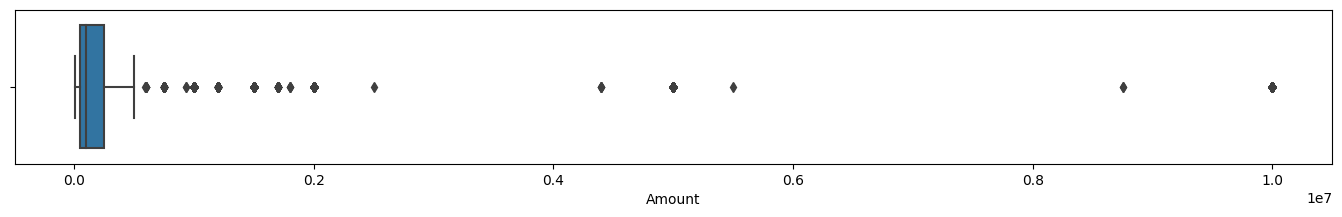

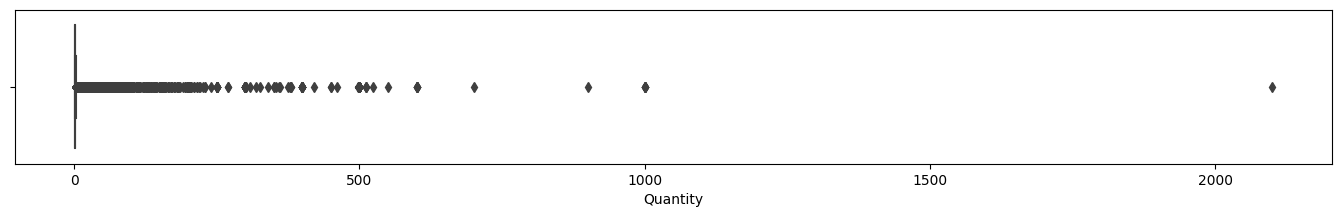

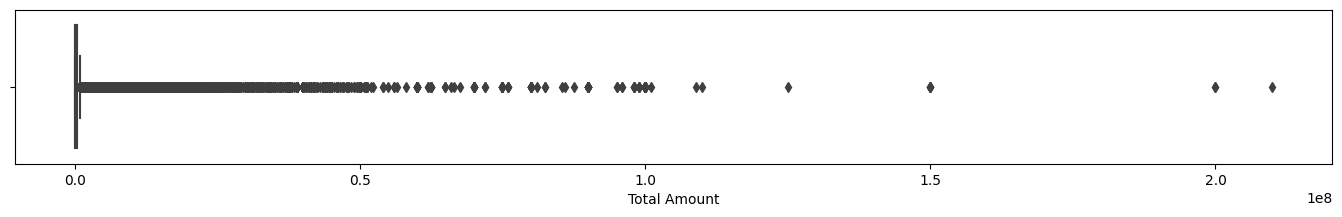

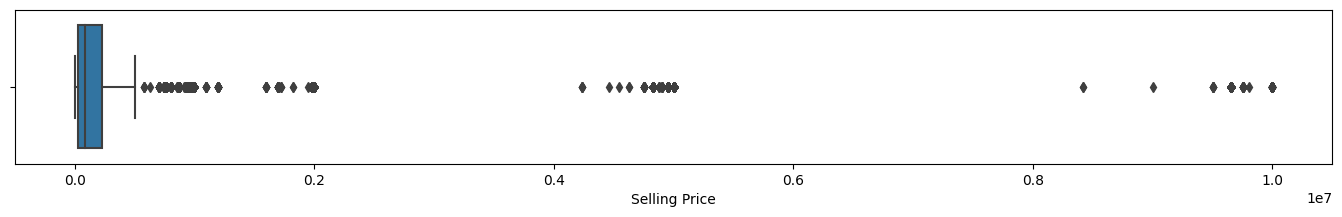

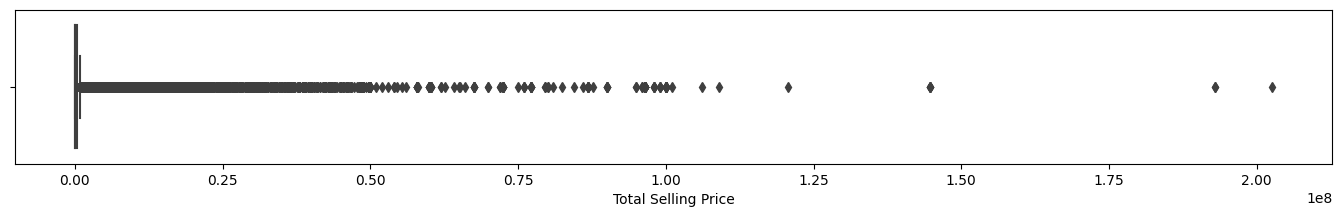

In [ ]:
numerical=["Amount","Quantity","Total Amount","Selling Price","Total Selling Price"]
for column in numerical:
        plt.figure(figsize=(17,2))
        sns.boxplot(data=df, x=column)

In [ ]:
def handler(data):
    outliers = []
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)

    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)

    for i in data:
        if i<lwr_bound :
          data[data==i]=np.nan
        if i>upr_bound :
          data[data==i]=np.nan

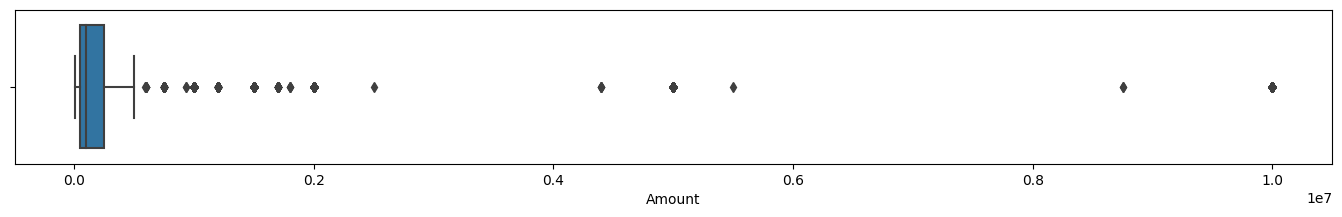

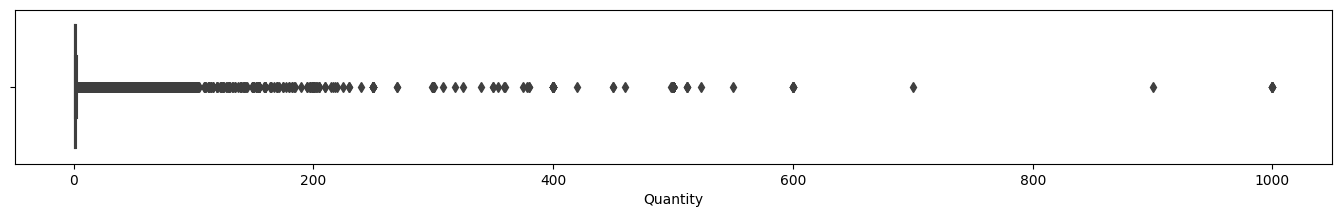

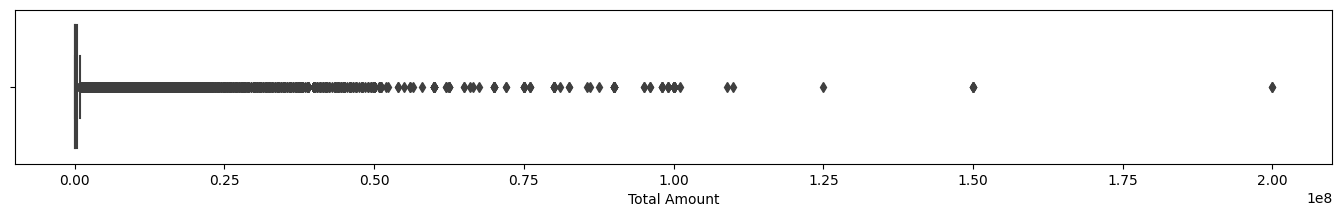

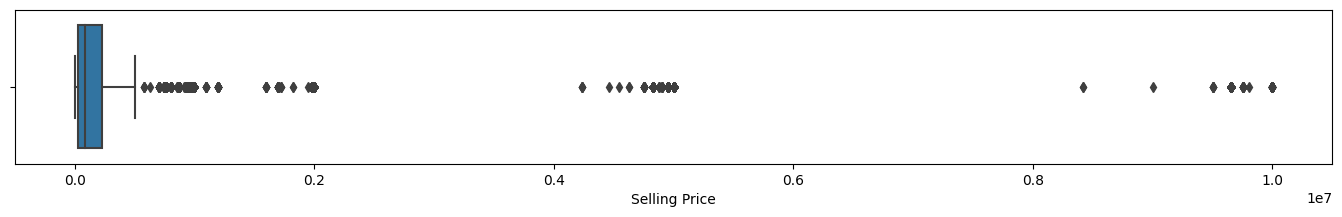

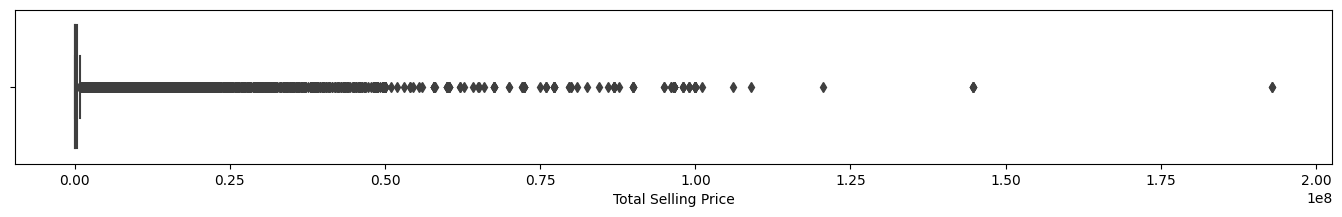

In [ ]:
for i in range (0,len(df['Quantity'])):
  if df['Quantity'].iloc[i]> 1000:
    df['Quantity'].iloc[i] =np.nan
df.dropna(inplace=True)

for column in numerical:
        plt.figure(figsize=(17,2))
        sns.boxplot(data=df, x=column)

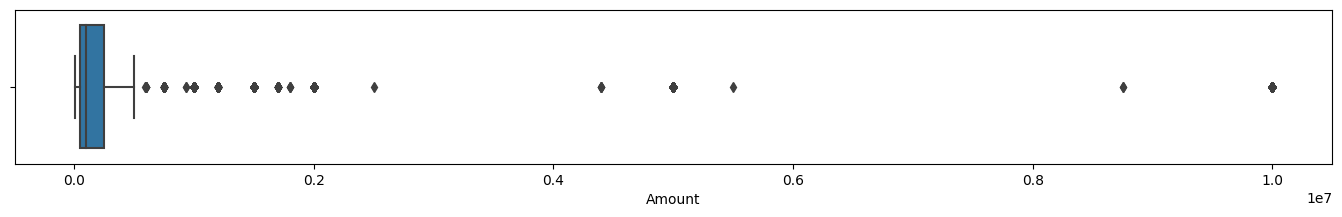

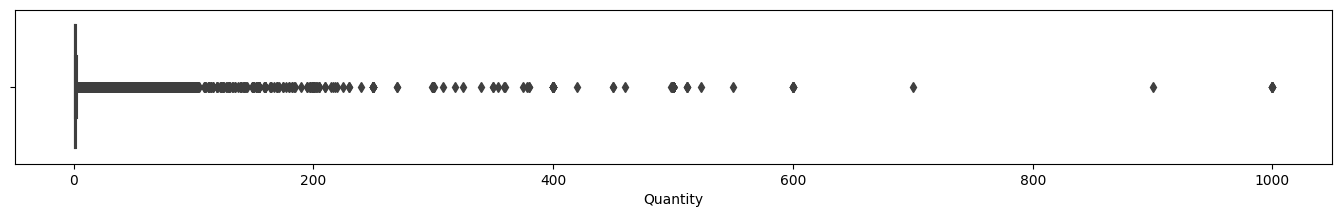

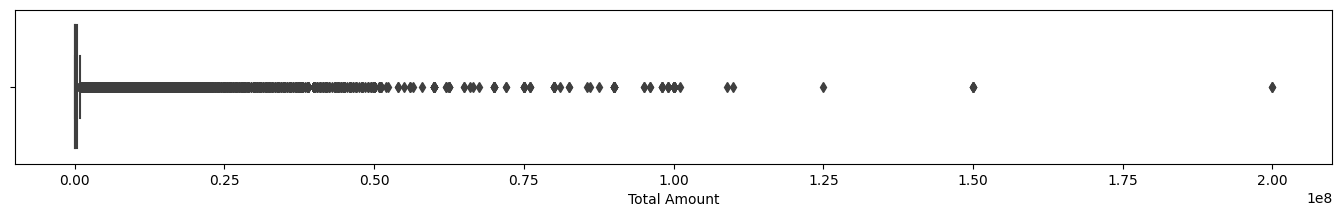

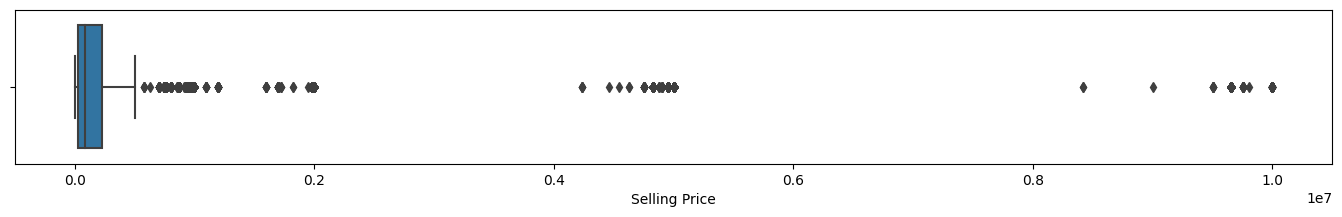

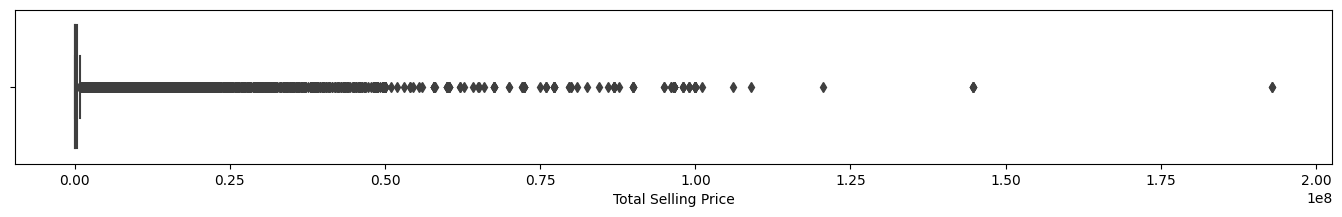

In [ ]:
handler(df['Amount'])
handler(df['Quantity'])
handler(df['Selling Price'])


df.isnull().sum()
df.drop_duplicates(inplace= True)
df.dropna(inplace = True)

for column in numerical:
        plt.figure(figsize=(17,2))
        sns.boxplot(data=df, x=column)

In [ ]:
df.shape

(654321, 15)

In [ ]:
df.reset_index(inplace = True,drop = True)

## EDA

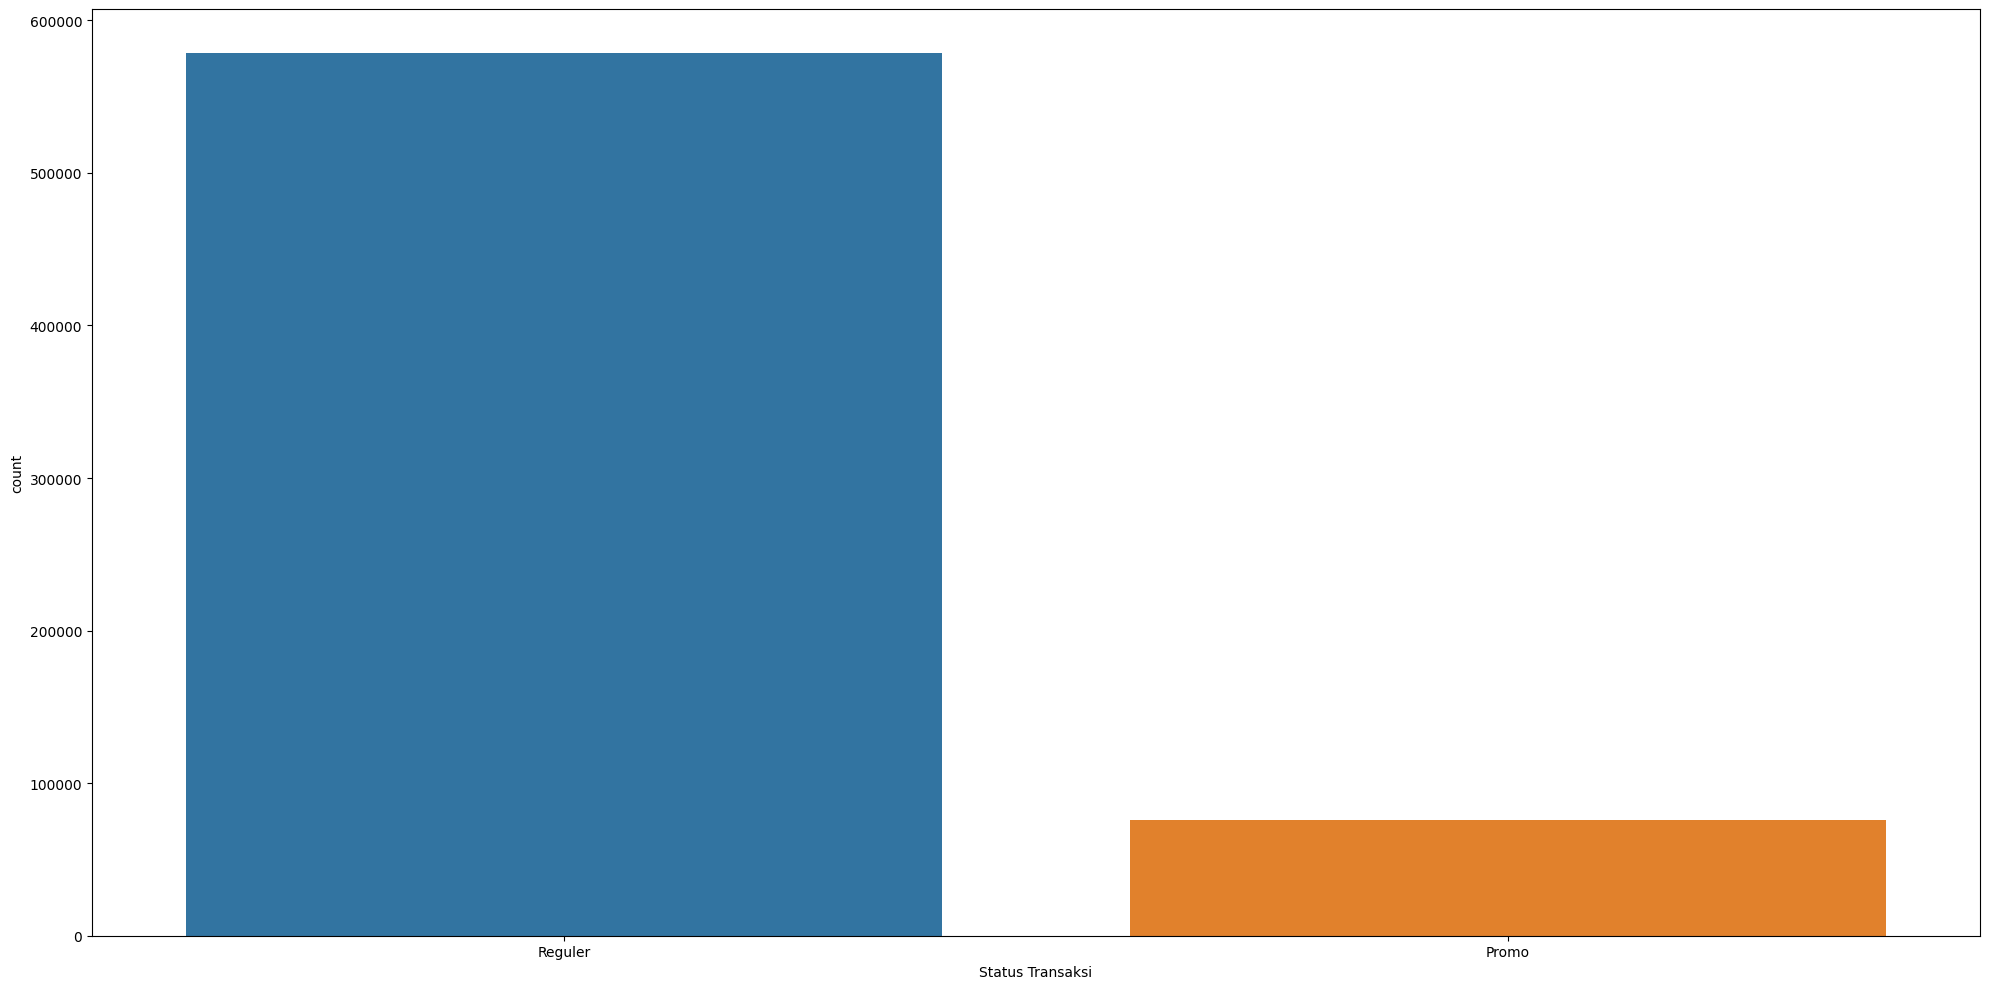

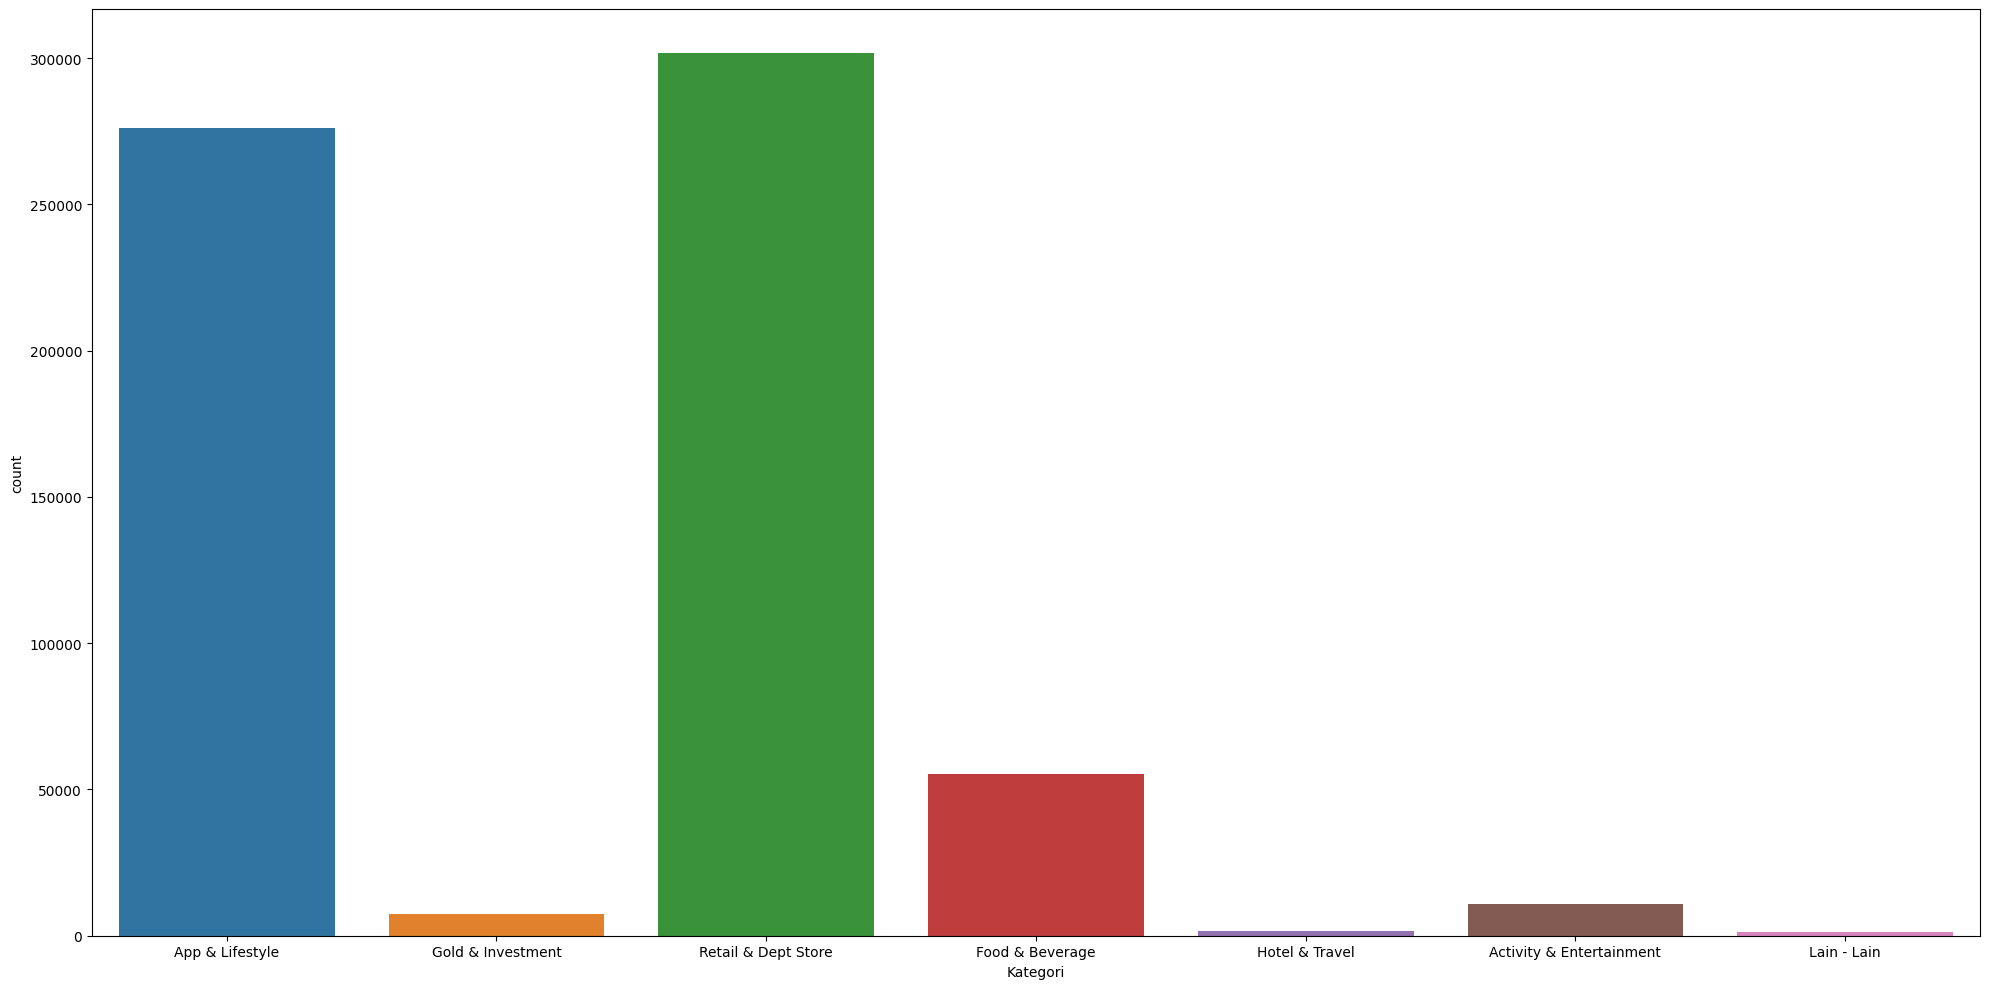

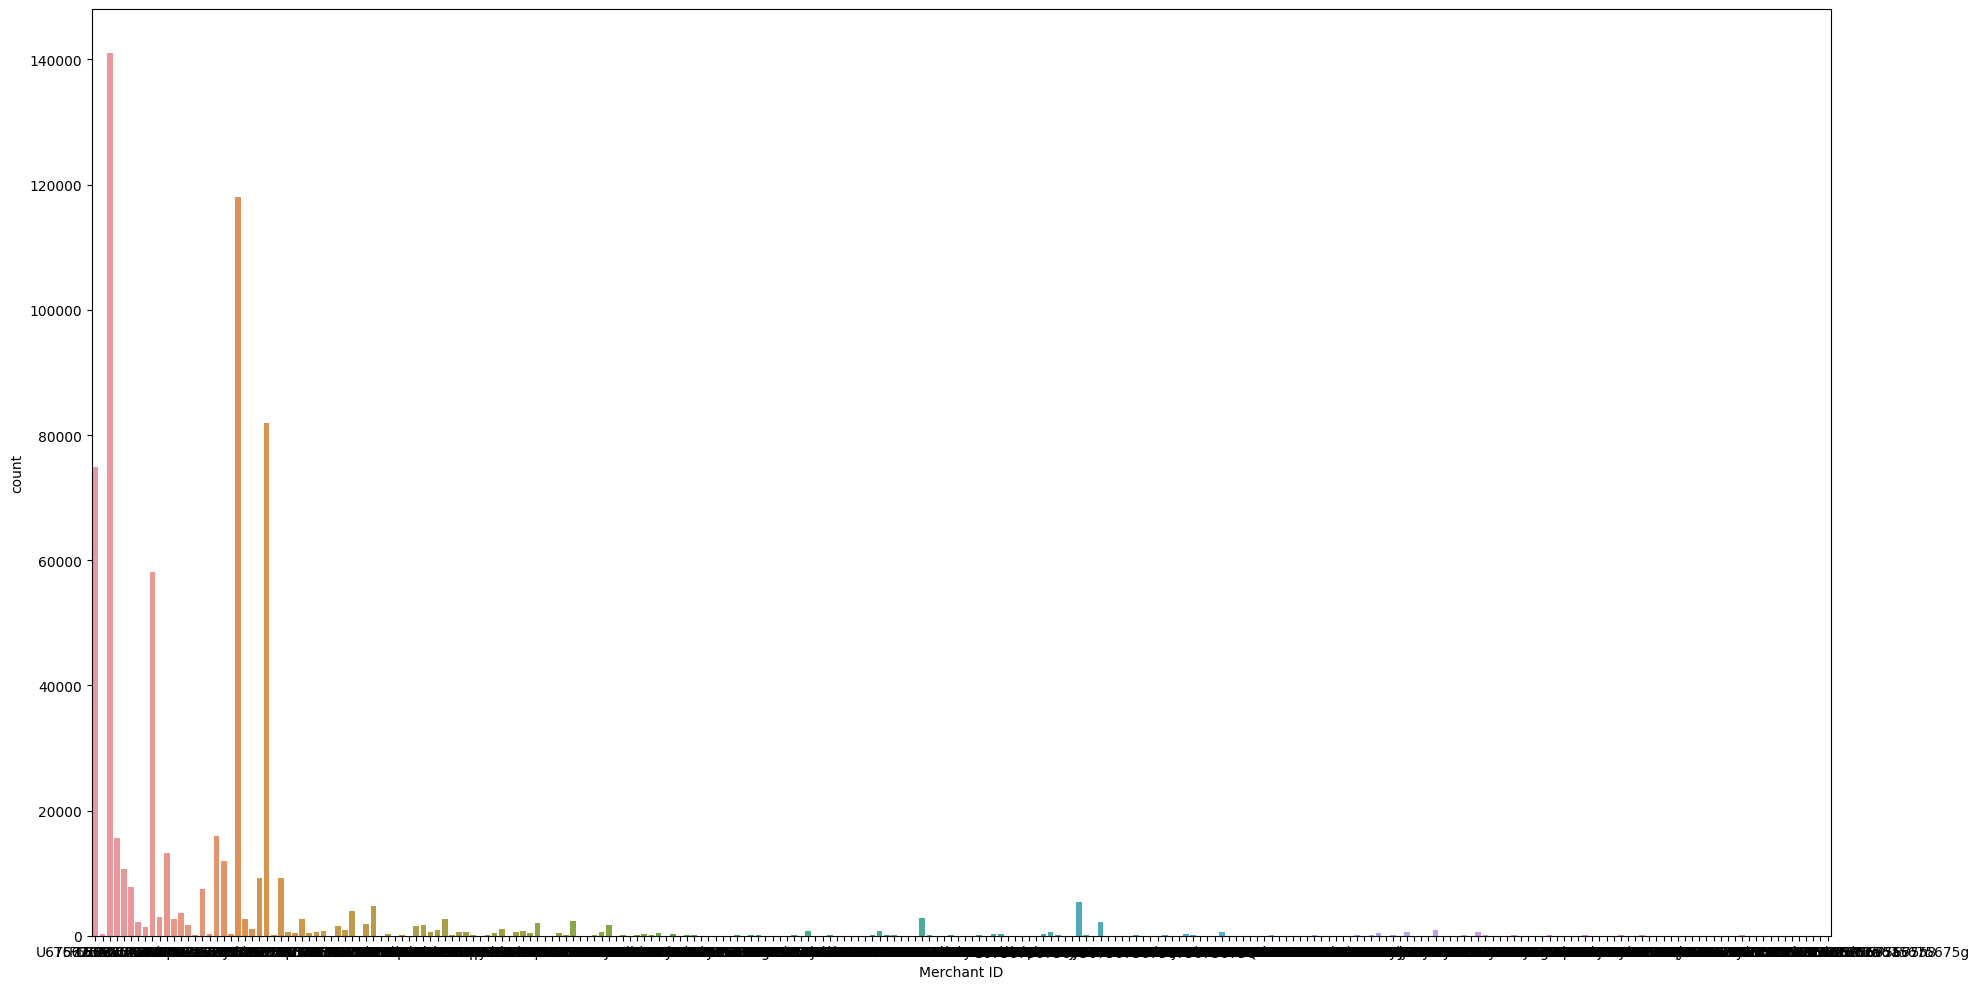

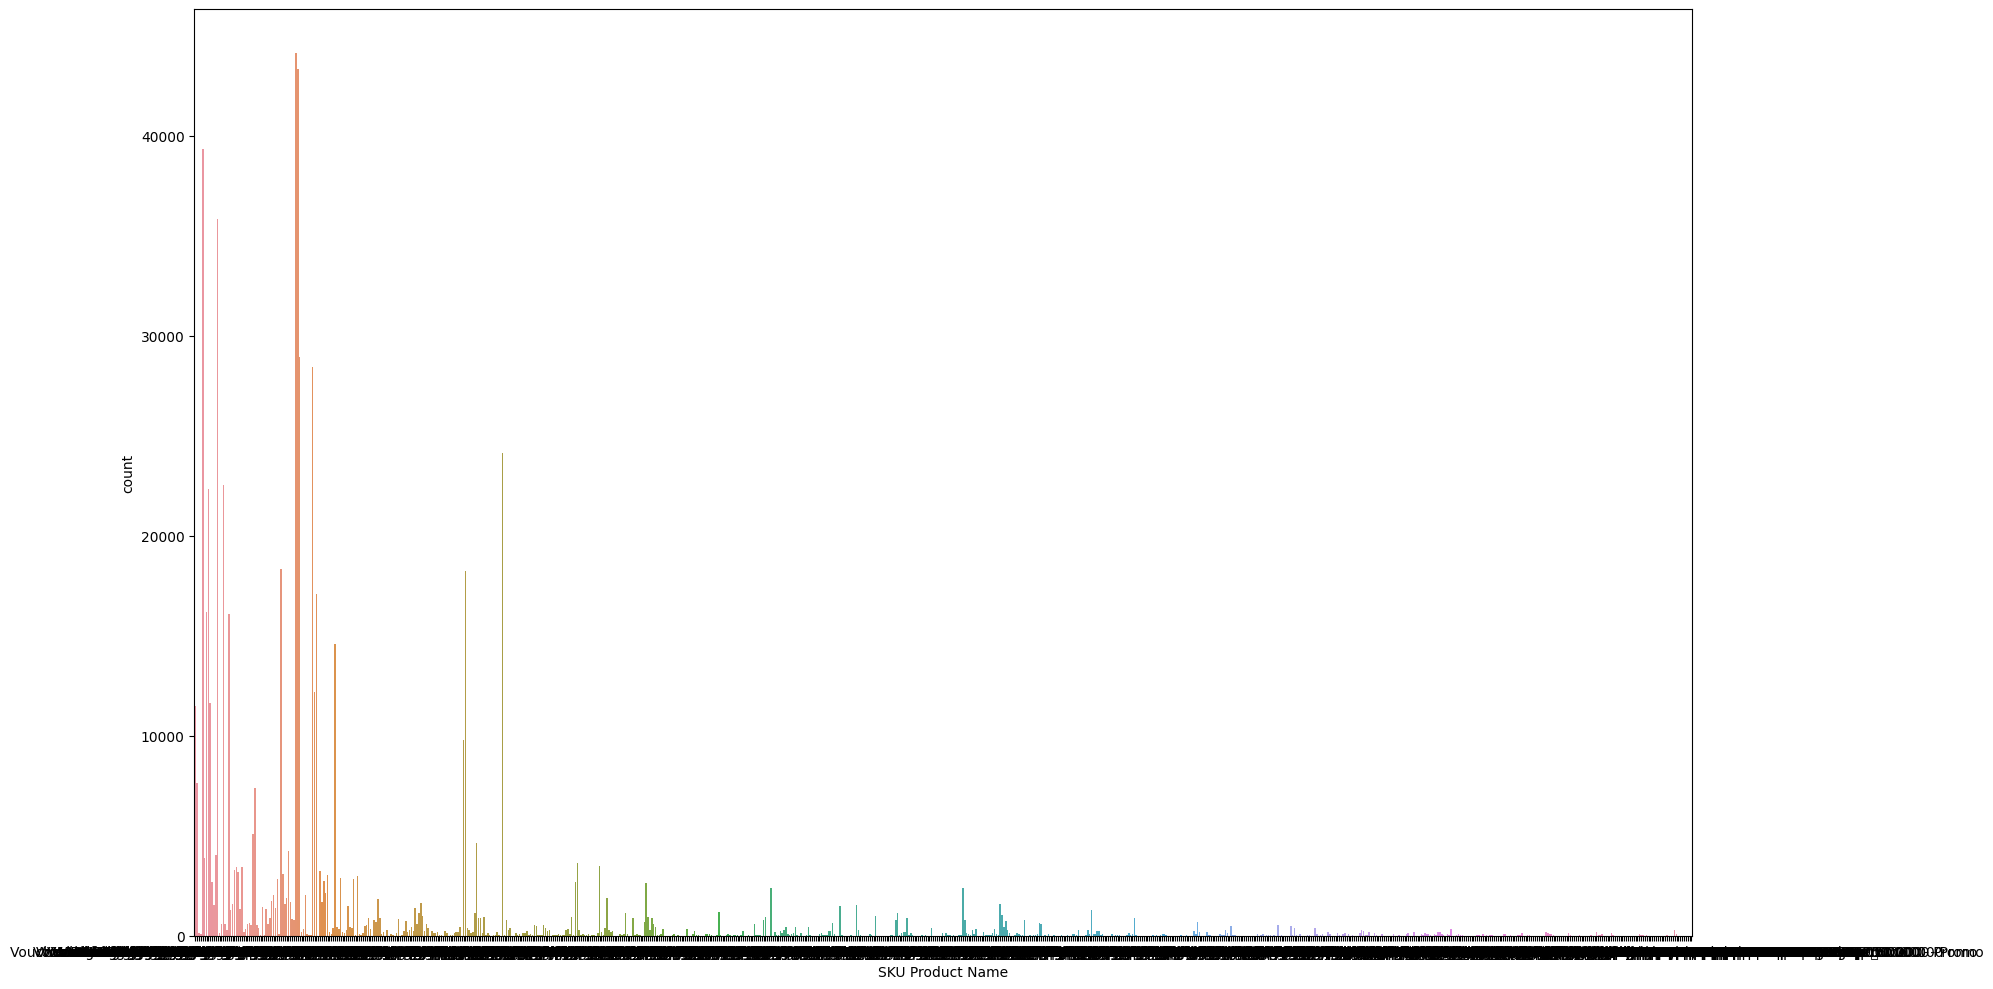

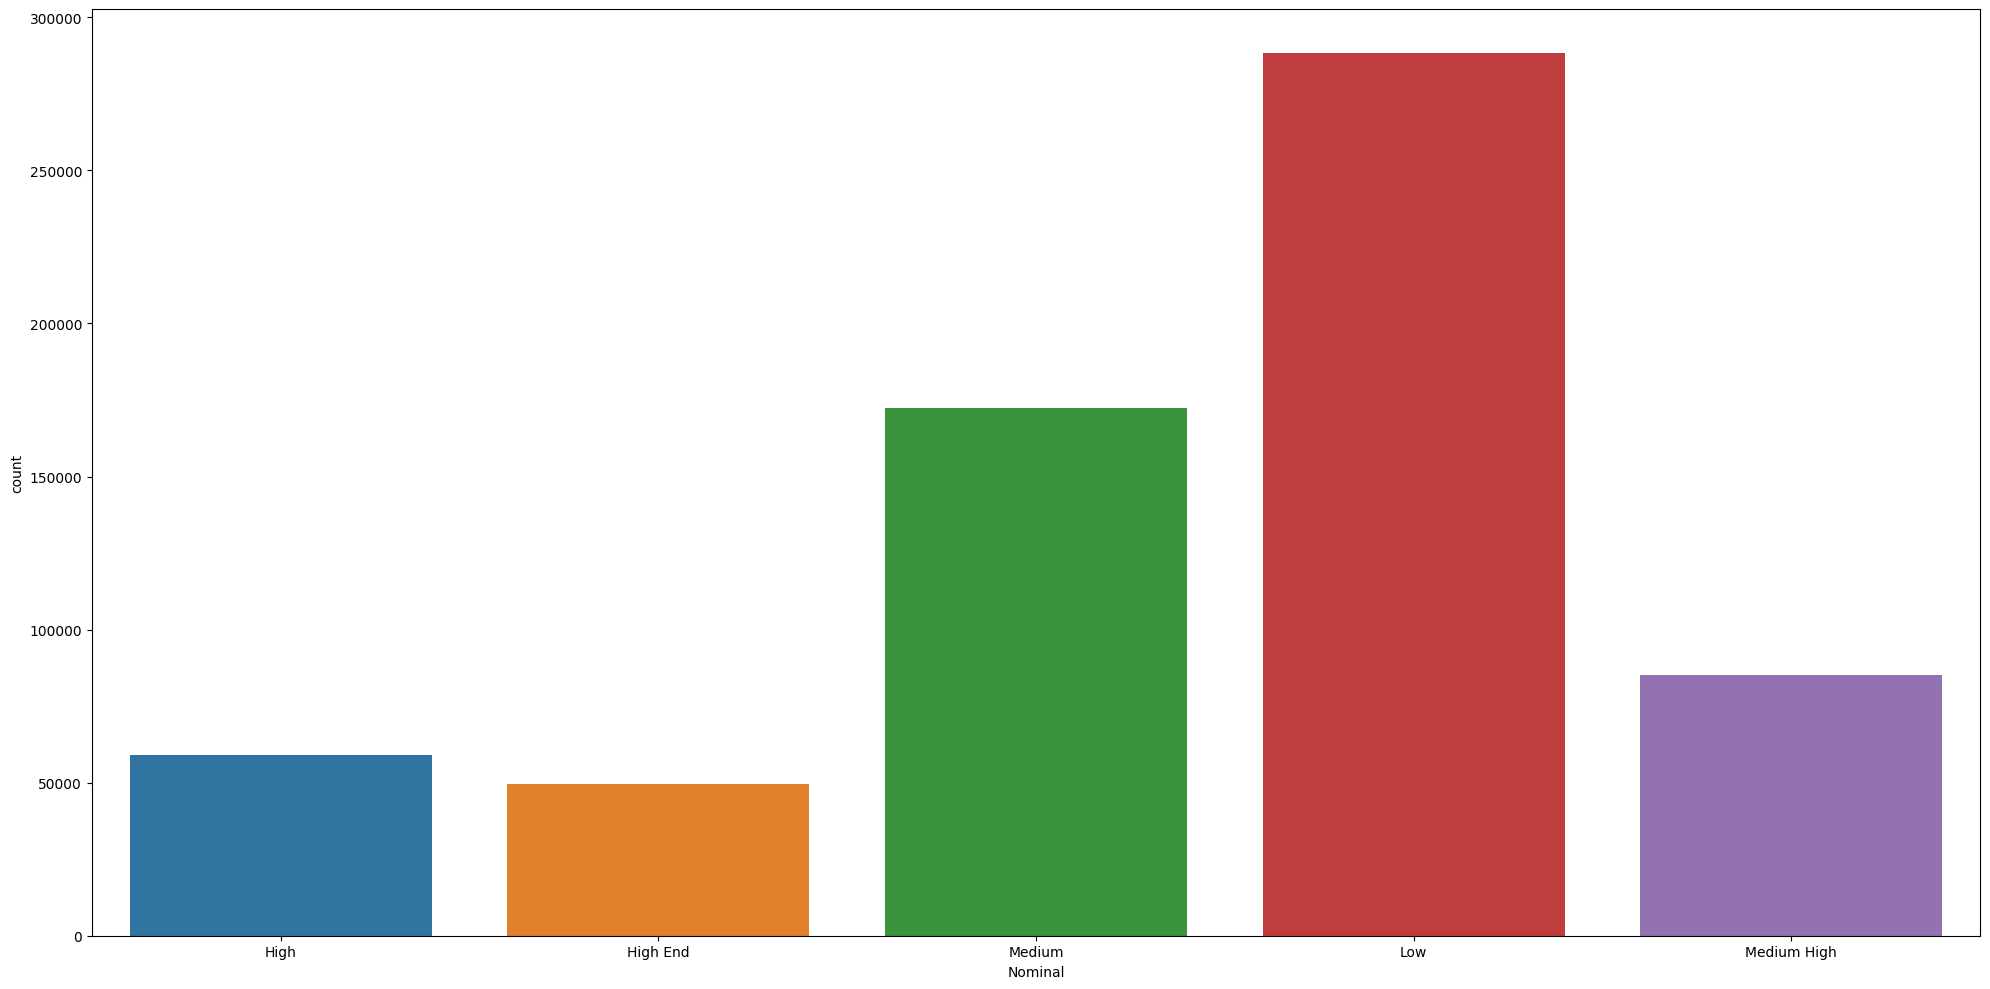

In [ ]:
categorical=["Status Transaksi","Kategori","Merchant ID","SKU Product Name","Nominal"]
for col in categorical:
    plt.figure(figsize=(20,10))
    sns.countplot(x=col, data=df)
    plt.tight_layout()

In [ ]:
df['month']=df['Date'].astype(str).str[5:7]
df.head()

,Nomor Transaksi,Status Transaksi,Order At,Date,Merchant ID,Kategori,SKU Product Name,Nomor Customer,Register Date,Amount,Selling Price,Quantity,Total Amount,Total Selling Price,Nominal,month
0,1.640970e+12,Reguler,2022-01-01 00:02:30,2022-01-01,T675a,App & Lifestyle,Voucher Digital T675a Rp. 500.000,rpbvpbvu,2021-10-16,500000,500000,1.0,500000,500000,High,01
1,1.640970e+12,Reguler,2022-01-01 00:07:05,2022-01-01,T675a,App & Lifestyle,Voucher Digital T675a Rp. 500.000,rpbvpbvu,2021-10-16,500000,500000,1.0,500000,500000,High,01
2,1.640970e+12,Reguler,2022-01-01 00:09:00,2022-01-01,T675a,App & Lifestyle,Voucher Digital T675a Rp. 1.000.000,ipbvpbve,2021-08-02,1000000,1000000,1.0,1000000,1000000,High End,01
3,1.640970e+12,Reguler,2022-01-01 00:11:50,2022-01-01,T672672672a,Gold & Investment,Voucher Digital T672672672a Rp. 100.000,rpbvpbvn,2020-09-11,100000,99000,1.0,100000,99000,Medium,01
4,1.640970e+12,Reguler,2022-01-01 00:11:50,2022-01-01,T672672672a,Gold & Investment,Voucher Digital T672672672a Rp. 1.000.000,rpbvpbvn,2020-09-11,1000000,990000,2.0,2000000,1980000,High End,01


In [ ]:
import plotly.express as px
custom_aggregation = {}
custom_aggregation['Total Selling Price']='sum'
data4=df.groupby("month").agg(custom_aggregation)

data4.columns = ["sum"]
data4["month"] = data4.index

fig = px.line(data4, x="month",y="sum",title="Total Penjualan Per Bulan")

fig.show()

In [ ]:
custom_aggregation = {}
custom_aggregation['Quantity']='sum'
data5=df.groupby("month").agg(custom_aggregation)

data5.columns = ["sum"]
data5["month"] = data5.index

fig = px.line(data5, x="month",y="sum",title="Total Kuantitas yang dibeli Per Bulan")

fig.show()

### Jumlah voucher yang dibeli berdasarkan Status Transaksi per Bulan

In [ ]:
date_df = df['Date']
date_df['Bulan'] = df['Date'].str[5:7]

df['Bulan'] = date_df['Bulan']


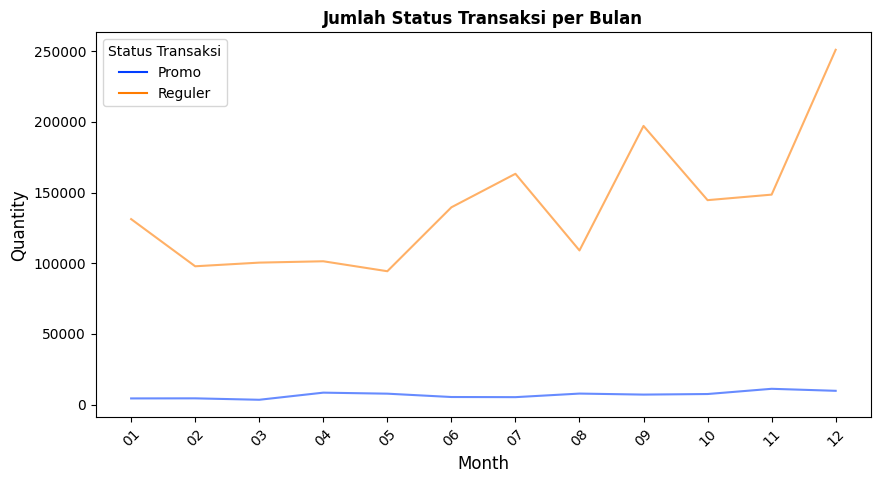

In [ ]:
grouped_df = df.groupby(['Bulan', 'Status Transaksi'])['Quantity'].sum().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(x = "Bulan", y="Quantity", hue="Status Transaksi", data=grouped_df, palette = 'bright', alpha = 0.6)
plt.title("Jumlah Status Transaksi per Bulan", fontsize=12, weight="bold")
plt.xlabel("Month", fontsize=12)
plt.xticks(rotation=45)
plt.ylabel("Quantity", fontsize=12)
plt.show()

### Hubungan Kategori dan Status Transaksi

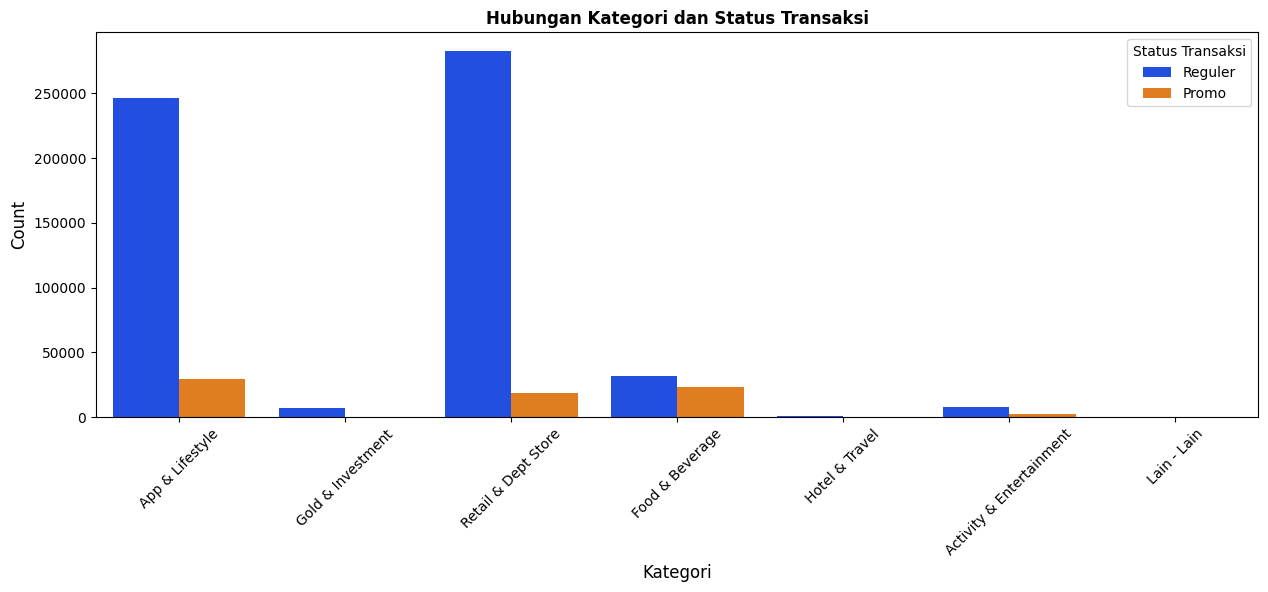

In [ ]:
# barplot with standard deviation:
plt.figure(figsize=(15,5))
sns.countplot(x = 'Kategori', hue='Status Transaksi', data=df, palette='bright')
plt.title("Hubungan Kategori dan Status Transaksi", fontsize=12, weight="bold")
plt.xlabel("Kategori", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Menghitung jumlah berdasarkan kategori dan status transaksi
grouped_df = df.groupby(['Kategori', 'Status Transaksi']).size().reset_index(name='Jumlah')

# Menampilkan tabel dengan kategori dan jumlah berdasarkan status transaksi
print(grouped_df)

                    Kategori Status Transaksi  Jumlah
0   Activity & Entertainment            Promo    2726
1   Activity & Entertainment          Reguler    8259
2            App & Lifestyle            Promo   29903
3            App & Lifestyle          Reguler  246191
4            Food & Beverage            Promo   23236
5            Food & Beverage          Reguler   31985
6          Gold & Investment            Promo     176
7          Gold & Investment          Reguler    7364
8             Hotel & Travel            Promo     410
9             Hotel & Travel          Reguler    1294
10               Lain - Lain            Promo     548
11               Lain - Lain          Reguler     564
12       Retail & Dept Store            Promo   18828
13       Retail & Dept Store          Reguler  282837


### Persentase Kategori

In [ ]:
#Kategori

import plotly.graph_objects as go

frequency = df['Kategori'].value_counts()
labels = frequency.index
values = frequency.values
palette = [ "#acc4cc", "#6e2624", "#43bba7", "#ec462f", "#fbe45b", "#984063", "#45789D"]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=0.5, title='Persentase Kategori', pull = [0.1, 0.1, 0.1, 0.1])])
fig.update_traces(marker = dict(colors = palette))
fig.show()

### Kategori penjualan berdasarkan Bulan

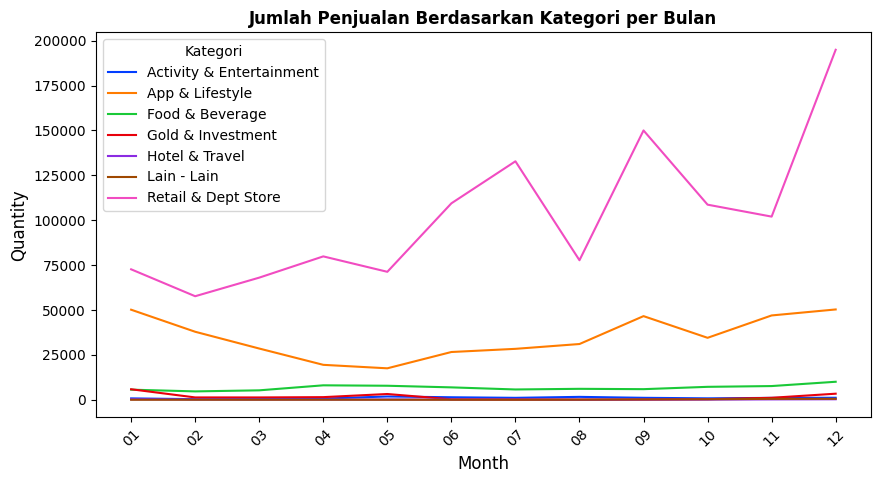

In [ ]:
grouped_df = df.groupby(['Bulan', 'Kategori'])['Quantity'].sum().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(x = "Bulan", y="Quantity", hue="Kategori", data=grouped_df, palette = 'bright')
plt.title("Jumlah Penjualan Berdasarkan Kategori per Bulan", fontsize=12, weight="bold")
plt.xlabel("Month", fontsize=12)
plt.xticks(rotation=45)
plt.ylabel("Quantity", fontsize=12)
plt.show()

### Kategori berdasarkan Quantity Penjualan

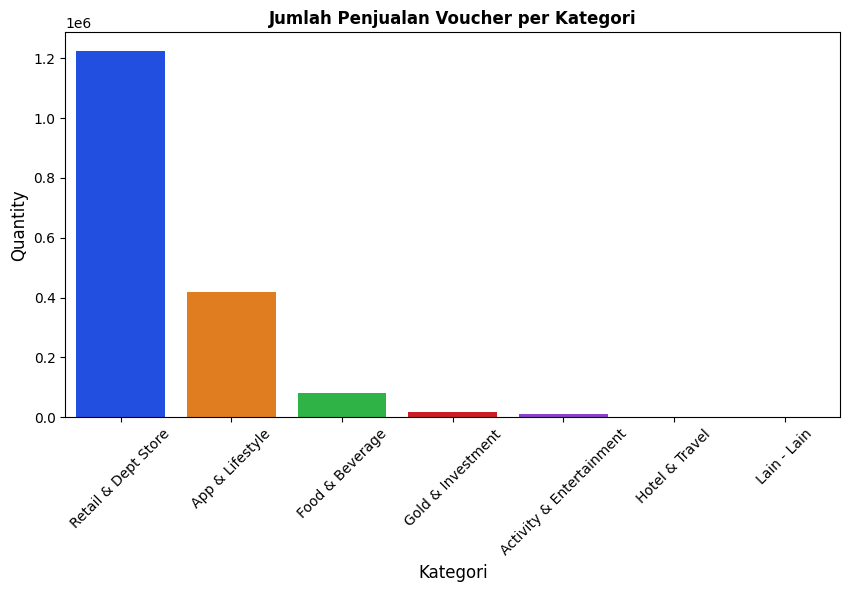

In [ ]:
# Pengelompokan dan penghitungan jumlah quantity berdasarkan kategori voucher
grouped_df = df.groupby('Kategori')['Quantity'].sum().reset_index()
grouped_df = grouped_df.sort_values(by='Quantity', ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x='Kategori', y='Quantity', data=grouped_df, palette='bright')
plt.title("Jumlah Penjualan Voucher per Kategori", fontsize=12, weight="bold")
plt.xlabel("Kategori", fontsize=12)
plt.ylabel("Quantity", fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Coba tabel
# Menghitung jumlah quantity berdasarkan kategori voucher
grouped_df = df.groupby('Kategori')['Quantity'].sum().reset_index()
grouped_df = grouped_df.sort_values(by='Quantity', ascending=False)
# Menampilkan tabel dengan kategori dan jumlah quantity
print(grouped_df)

                   Kategori   Quantity
6       Retail & Dept Store  1225204.0
1           App & Lifestyle   418177.0
2           Food & Beverage    81203.0
3         Gold & Investment    18853.0
0  Activity & Entertainment    12420.0
4            Hotel & Travel     2067.0
5               Lain - Lain     1939.0


### Bulan Penjualan Paling Banyak

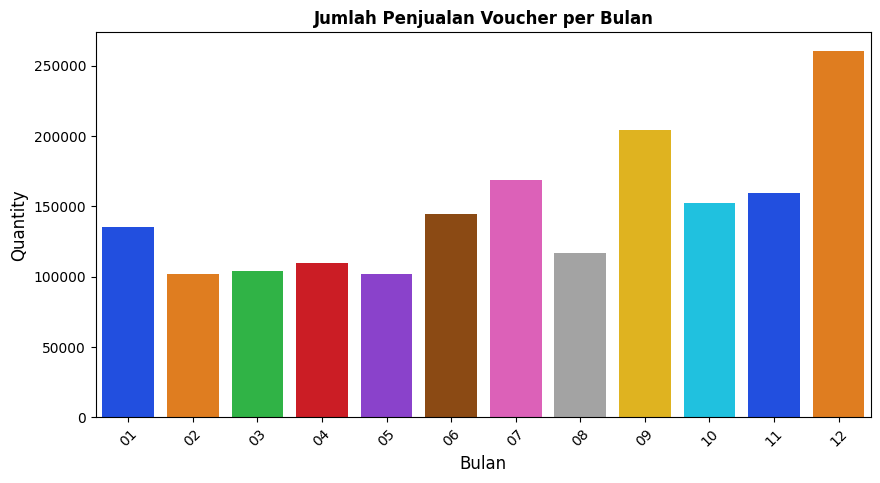

In [ ]:
# Pengelompokan dan penghitungan jumlah quantity berdasarkan bulan
grouped_df = df.groupby('Bulan')['Quantity'].sum().reset_index()

plt.figure(figsize=(10,5))
sns.barplot(x='Bulan', y='Quantity', data=grouped_df, palette='bright')
plt.title("Jumlah Penjualan Voucher per Bulan", fontsize=12, weight="bold")
plt.xlabel("Bulan", fontsize=12)
plt.ylabel("Quantity", fontsize=12)
plt.xticks(rotation=45)
plt.show()

### Register Date Paling Banyak di Tanggal Berapa

In [ ]:
date_df = df['Register Date']
date_df['Tanggal'] = df['Register Date'].str[-2:]

df['Tanggal'] = date_df['Tanggal']

Text(0, 0.5, 'Count')

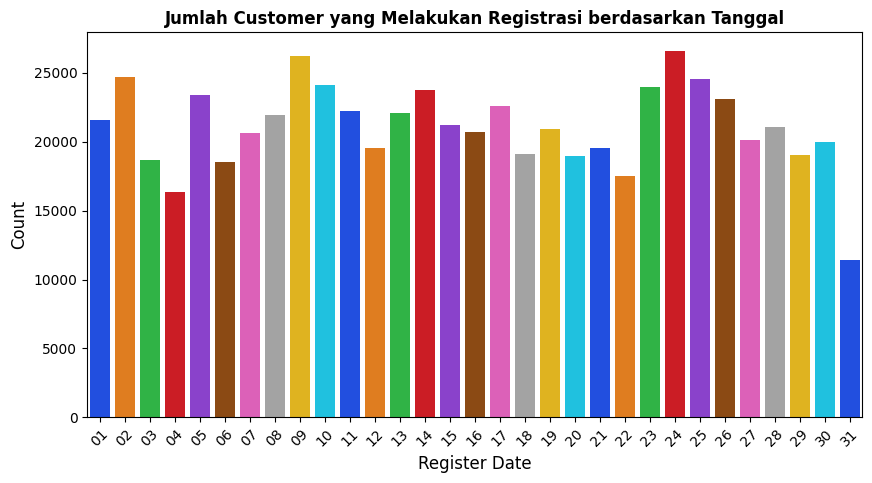

In [ ]:
# `Register Date` exploration

plt.figure(figsize=(10,5))
sns.countplot(x="Tanggal", data=df, palette='bright', order=sorted(df['Tanggal'].unique()))
plt.title('Jumlah Customer yang Melakukan Registrasi berdasarkan Tanggal', fontsize=12, weight='bold')
plt.xlabel('Register Date', fontsize=12)
plt.xticks(rotation=45)
plt.ylabel('Count', fontsize=12)

### Tanggal Transaksi Paling Banyak di Transaksi Berapa

In [ ]:
date_df = df['Date']
date_df['Tanggal Transaksi'] = df['Date'].str[-2:]

df['Tanggal Transaksi'] = date_df['Tanggal Transaksi']

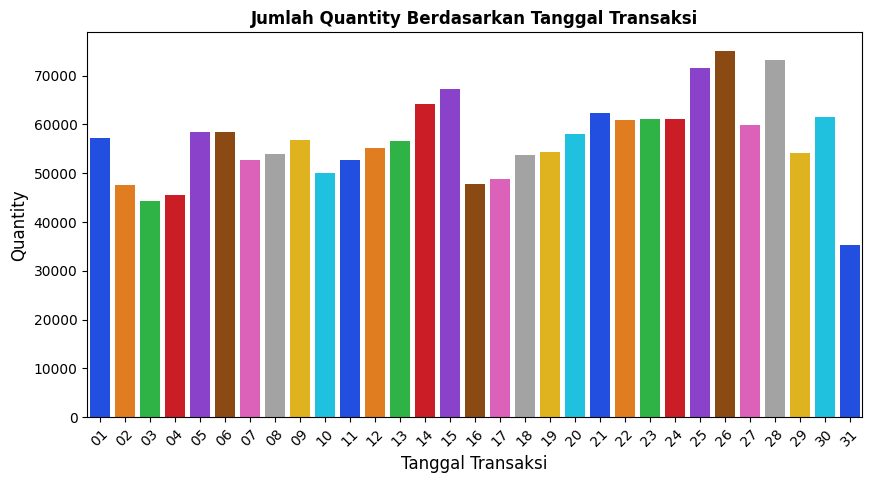

In [ ]:
# Pengelompokan dan penghitungan jumlah quantity berdasarkan tanggal transaksi
grouped_df = df.groupby('Tanggal Transaksi')['Quantity'].sum().reset_index()

# Membuat barplot
plt.figure(figsize=(10, 5))
sns.barplot(x='Tanggal Transaksi', y='Quantity', data=grouped_df, palette='bright')
plt.title('Jumlah Quantity Berdasarkan Tanggal Transaksi', fontsize=12, weight='bold')
plt.xlabel('Tanggal Transaksi', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.xticks(rotation=45)
plt.show()

### Keuntungan Customer


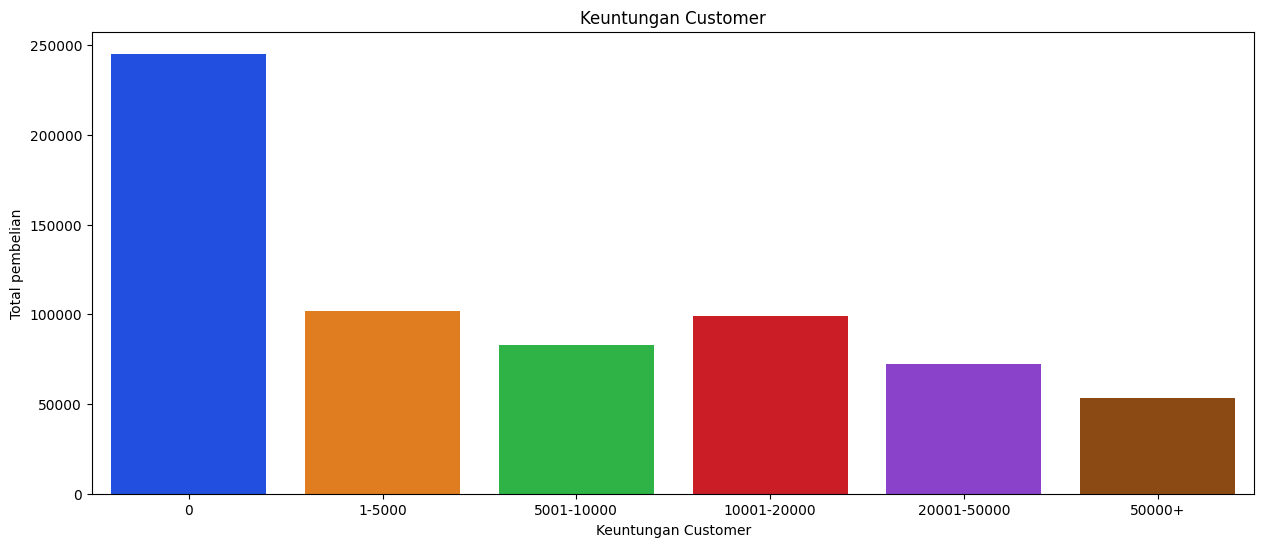

In [ ]:
df['Keuntungan_Cust'] = df['Amount'] - df['Selling Price']

# Menggolongkan keuntungan customer dan melihat persebarannya dalam data
zero = df.Keuntungan_Cust[(df.Keuntungan_Cust == 0)  ]
low = df.Keuntungan_Cust[(df.Keuntungan_Cust > 1) & (df.Keuntungan_Cust <= 5000)  ]
midlow = df.Keuntungan_Cust[(df.Keuntungan_Cust > 5001) & (df.Keuntungan_Cust <= 10000)  ]
med = df.Keuntungan_Cust[(df.Keuntungan_Cust > 10001) & (df.Keuntungan_Cust <= 20000)]
midhigh = df.Keuntungan_Cust[(df.Keuntungan_Cust > 20001) & (df.Keuntungan_Cust <= 50000) ]
high = df.Keuntungan_Cust[(df.Keuntungan_Cust >= 50001)  ]



x = ["0","1-5000","5001-10000","10001-20000","20001-50000","50000+"]
y = [len(zero.values),len(low.values),len(midlow.values),len(med.values),len(midhigh.values),len(high.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="bright")
plt.title("Keuntungan Customer")
plt.xlabel("Keuntungan Customer")
plt.ylabel("Total pembelian")
plt.show()

## Label Encoder

In [ ]:
label_encoder = LabelEncoder()
encoded_data = df[categorical].apply(label_encoder.fit_transform)
cluster_data = pd.concat([encoded_data, df[["Amount","Selling Price","Quantity","Total Amount","Total Selling Price"]]], axis=1)
cluster_data.head()

,Status Transaksi,Kategori,Merchant ID,SKU Product Name,Nominal,Amount,Selling Price,Quantity,Total Amount,Total Selling Price
0,1,1,220,705,0,500000,500000,1.0,500000,500000
1,1,1,220,705,0,500000,500000,1.0,500000,500000
2,1,1,220,696,1,1000000,1000000,1.0,1000000,1000000
3,1,3,208,667,3,100000,99000,1.0,100000,99000
4,1,3,208,666,1,1000000,990000,2.0,2000000,1980000


## Feature Engineering

### Feature Selection

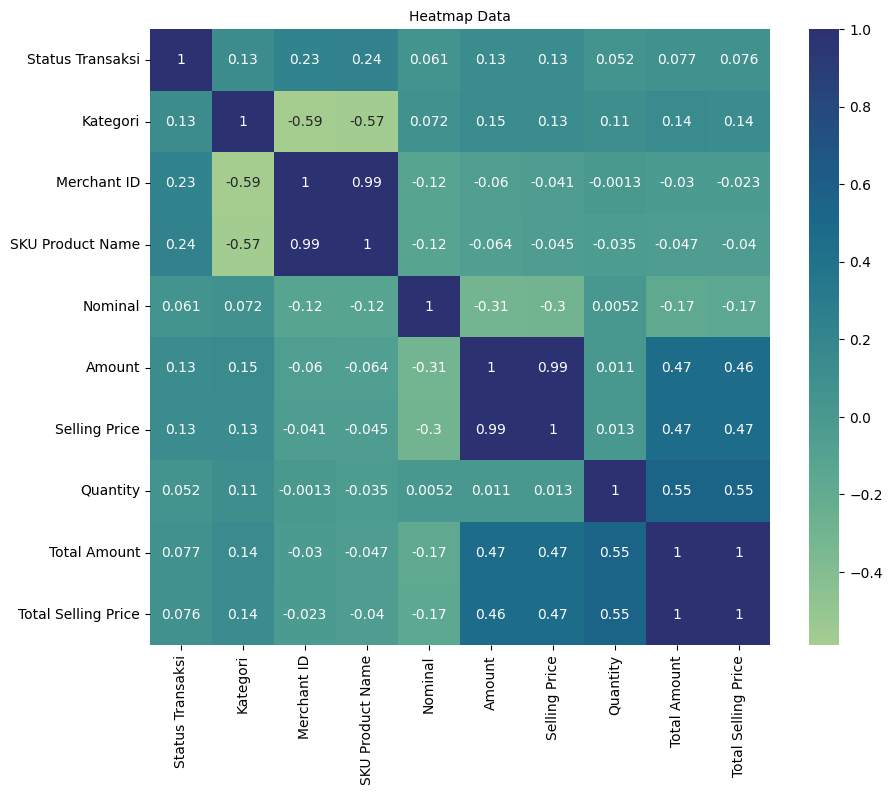

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(cluster_data.corr(), cmap = 'crest', annot = True)
plt.title('Heatmap Data', fontsize = 10)
plt.show()

In [ ]:
cluster_data = cluster_data.drop(["Total Amount","Total Selling Price","Merchant ID","SKU Product Name"], axis = 1)
cluster_data.head()

,Status Transaksi,Kategori,Nominal,Amount,Selling Price,Quantity
0,1,1,0,500000,500000,1.0
1,1,1,0,500000,500000,1.0
2,1,1,1,1000000,1000000,1.0
3,1,3,3,100000,99000,1.0
4,1,3,1,1000000,990000,2.0


### Scaling

In [ ]:
scaler = MinMaxScaler()
cluster_data[["Status Transaksi","Kategori","Amount","Selling Price","Quantity","Nominal"]] = scaler.fit_transform(cluster_data[["Nominal","Status Transaksi","Kategori","Amount","Selling Price","Quantity"]])
cluster_data

,Status Transaksi,Kategori,Nominal,Amount,Selling Price,Quantity
0,0.00,1.0,0.000000,0.166667,0.049525,0.049976
1,0.00,1.0,0.000000,0.166667,0.049525,0.049976
2,0.25,1.0,0.000000,0.166667,0.099550,0.099977
3,0.75,1.0,0.000000,0.500000,0.009505,0.009875
4,0.25,1.0,0.001001,0.500000,0.099550,0.098977
...,...,...,...,...,...,...
654316,0.50,0.0,0.000000,0.333333,0.004502,0.002975
654317,0.50,0.0,0.000000,0.333333,0.004502,0.003275
654318,0.50,1.0,0.000000,0.166667,0.000000,0.000475
654319,1.00,1.0,0.000000,0.000000,0.019510,0.016975


## Modelling

### Memilih k sesuai ELbow

In [ ]:
Sum_of_squared_error = []
K = range(2,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(cluster_data)
    Sum_of_squared_error.append(km.inertia_)

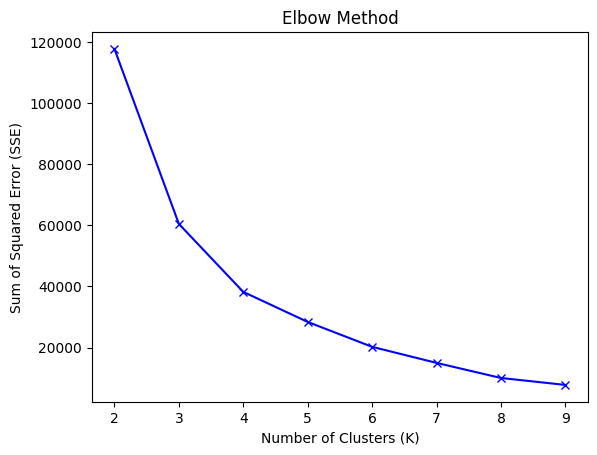

In [ ]:
# Plot SSE vs. number of clusters
plt.plot(K, Sum_of_squared_error, 'bx-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Error (SSE)')
plt.title('Elbow Method')
plt.show()

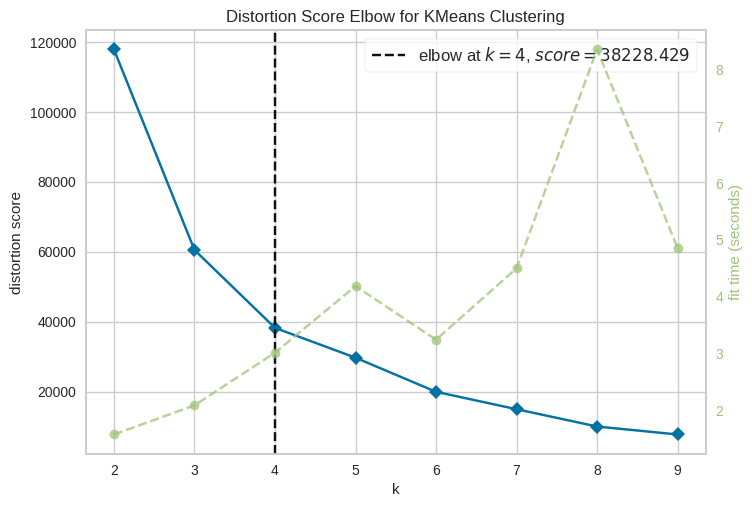

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,10), timings= True)
visualizer.fit(cluster_data)        # Fit data to visualizer
visualizer.show()                   # Finalize and render figure

### K-Means Clustering

In [ ]:
cluster = KMeans(n_clusters=4)
cluster.fit(cluster_data)

KMeans(n_clusters=4)

In [ ]:
segment = pd.Series(cluster.labels_, name="segment")
results = pd.concat([df, segment], axis=1)
results.head()

,Nomor Transaksi,Status Transaksi,Order At,Date,Merchant ID,Kategori,SKU Product Name,Nomor Customer,Register Date,Amount,...,Quantity,Total Amount,Total Selling Price,Nominal,month,Bulan,Tanggal,Tanggal Transaksi,Keuntungan_Cust,segment
0,1.640970e+12,Reguler,2022-01-01 00:02:30,2022-01-01,T675a,App & Lifestyle,Voucher Digital T675a Rp. 500.000,rpbvpbvu,2021-10-16,500000,...,1.0,500000,500000,High,01,01,16,01,0,1
1,1.640970e+12,Reguler,2022-01-01 00:07:05,2022-01-01,T675a,App & Lifestyle,Voucher Digital T675a Rp. 500.000,rpbvpbvu,2021-10-16,500000,...,1.0,500000,500000,High,01,01,16,01,0,1
2,1.640970e+12,Reguler,2022-01-01 00:09:00,2022-01-01,T675a,App & Lifestyle,Voucher Digital T675a Rp. 1.000.000,ipbvpbve,2021-08-02,1000000,...,1.0,1000000,1000000,High End,01,01,02,01,0,1
3,1.640970e+12,Reguler,2022-01-01 00:11:50,2022-01-01,T672672672a,Gold & Investment,Voucher Digital T672672672a Rp. 100.000,rpbvpbvn,2020-09-11,100000,...,1.0,100000,99000,Medium,01,01,11,01,1000,1
4,1.640970e+12,Reguler,2022-01-01 00:11:50,2022-01-01,T672672672a,Gold & Investment,Voucher Digital T672672672a Rp. 1.000.000,rpbvpbvn,2020-09-11,1000000,...,2.0,2000000,1980000,High End,01,01,11,01,10000,1


In [ ]:
results[results["segment"]==0][:20]

,Nomor Transaksi,Status Transaksi,Order At,Date,Merchant ID,Kategori,SKU Product Name,Nomor Customer,Register Date,Amount,...,Quantity,Total Amount,Total Selling Price,Nominal,month,Bulan,Tanggal,Tanggal Transaksi,Keuntungan_Cust,segment
23,1.640970e+12,Reguler,2022-01-01 01:04:57,2022-01-01,I675t,Retail & Dept Store,Voucher Digital I675t Rp. 25.000,apbvpbvm,2021-09-01,25000,...,1.0,25000,25000,Low,01,01,01,01,0,0
41,1.640980e+12,Reguler,2022-01-01 03:57:15,2022-01-01,M675p,Retail & Dept Store,Voucher Digital M675p Rp. 100.000,bpbvpbv.,2021-10-13,100000,...,1.0,100000,96500,Medium,01,01,13,01,3500,0
74,1.640990e+12,Reguler,2022-01-01 06:42:58,2022-01-01,A672672672672t,Retail & Dept Store,Voucher Digital A672672672672t Rp. 50.000,ypbvpbvn,2021-07-11,50000,...,1.0,50000,50000,Low,01,01,11,01,0,0
75,1.640990e+12,Reguler,2022-01-01 06:47:44,2022-01-01,A672672672672t,Retail & Dept Store,Voucher Digital A672672672672t Rp. 50.000,ypbvpbvn,2021-07-11,50000,...,1.0,50000,50000,Low,01,01,11,01,0,0
76,1.640990e+12,Reguler,2022-01-01 06:50:41,2022-01-01,I675t,Retail & Dept Store,Voucher Digital I675t Rp. 50.000,tpbvpbvi,2021-12-30,50000,...,1.0,50000,50000,Low,01,01,30,01,0,0
79,1.641000e+12,Reguler,2022-01-01 06:57:32,2022-01-01,A672672672672t,Retail & Dept Store,Voucher Digital A672672672672t Rp. 100.000,vpbvpbvi,2021-05-01,100000,...,1.0,100000,100000,Medium,01,01,01,01,0,0
87,1.641000e+12,Reguler,2022-01-01 07:29:20,2022-01-01,I675t,Retail & Dept Store,Voucher Digital I675t Rp. 50.000,bpbvpbvm,2021-12-17,50000,...,1.0,50000,50000,Low,01,01,17,01,0,0
90,1.641000e+12,Reguler,2022-01-01 07:37:14,2022-01-01,I675t,Retail & Dept Store,Voucher Digital I675t Rp. 100.000,npbvpbvr,2021-12-07,100000,...,1.0,100000,100000,Medium,01,01,07,01,0,0
95,1.641000e+12,Reguler,2022-01-01 07:42:53,2022-01-01,I675t,Retail & Dept Store,Voucher Digital I675t Rp. 50.000,mpbvpbv4,2021-04-11,50000,...,1.0,50000,50000,Low,01,01,11,01,0,0
96,1.641000e+12,Reguler,2022-01-01 07:42:56,2022-01-01,A672672672672t,Retail & Dept Store,Voucher Digital A672672672672t Rp. 50.000,lpbvpbva,2022-01-01,50000,...,1.0,50000,50000,Low,01,01,01,01,0,0


In [ ]:
results[results["segment"]==5][:5]

,Nomor Transaksi,Status Transaksi,Order At,Date,Merchant ID,Kategori,SKU Product Name,Nomor Customer,Register Date,Amount,...,Quantity,Total Amount,Total Selling Price,Nominal,month,Bulan,Tanggal,Tanggal Transaksi,Keuntungan_Cust,segment


### Visualisasi Hasil

Text(0.5, 1.0, 'Perbandingan Segment dengan Jumlah berdasarkan Kategori Nominal')

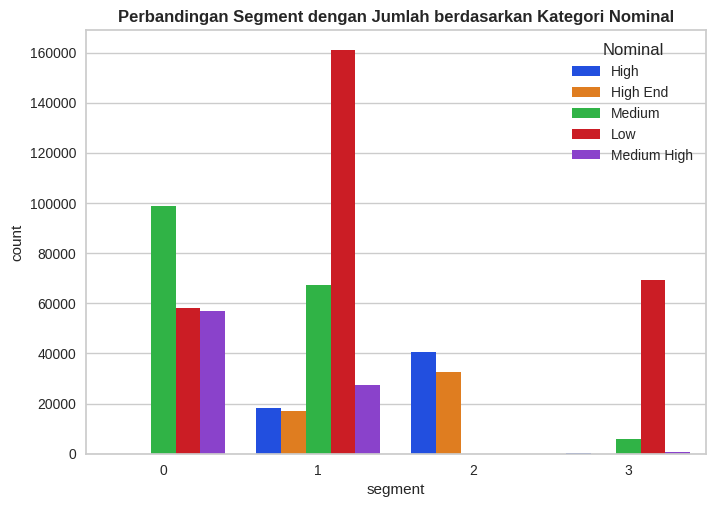

In [ ]:
# Segment vs Count (Nominal)
sns.countplot(x=results['segment'],hue="Nominal",data=results,palette="bright")
plt.title("Perbandingan Segment dengan Jumlah berdasarkan Kategori Nominal", fontsize=12, weight="bold")

* Cluster 0 : Cluster 0 adalah cluster yang memiliki range nominal dari low sampai medium high dengan jumlah paling banyak berada di nominal medium

* Cluster 1 : Cluster 1 adalah cluster yang memiliki range nominal dari low-high end dengan jumlah paling banyak berada di nominal low dan jumlah paling sedikit ada di nominal high end
* Cluster 2 : Cluster 2 adalah cluster yang memili range nominal dari high sampai high end dengan jumlah paling banyak berada di nominal high
* Cluster 3 : Cluster 3 adalah cluster yang memiliki range nominal dari low sampai medium high dengan jumlah paling banyak berada di nominal low dan jumlah paling sedikit ada di nominal medium high

Text(0.5, 1.0, 'Quantity VS Amount berdasarkan Segment')

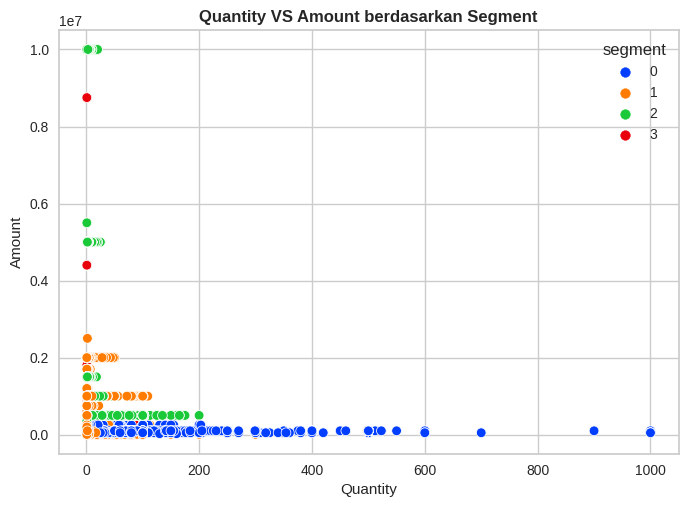

In [ ]:
# Quantity vs Amount (Segment)
sns.scatterplot(x=results['Quantity'],y=results['Amount'],hue="segment",data=results, palette="bright")
plt.title("Quantity VS Amount berdasarkan Segment", fontsize=12, weight="bold")

* Cluster 0 : Cluster 0 adalah cluster dengan pembelian produk yang memiliki range amount 0 sampai Rp 200.000. Quantity tertinggi di cluster ini adalah 1000 yang merupakan quantity tertinggi dari seluruh cluster.
* Cluster 1 : Cluster 1 adalah cluster dengan pembelian produk yang memiliki range amount 0 sampai Rp 250.000. Quantity tertinggi di cluster ini adalah 100.
* Cluster 2 : Cluster 2 adalah cluster dengan pembelian produk yang memiliki range amount Rp 50.000 sampai Rp 1.000.000. Quantity tertinggi di cluster ini adalah 200.
* Cluster 3 : Cluster 3 adalah cluster dengan pembelian produk yang memiliki range amount 0 sampai Rp 890.000. Quantity tertinggi di cluster ini adalah 100.

Text(0.5, 1.0, 'Perbandingan Segment dengan Jumlah berdasarkan Kategori Merchant')

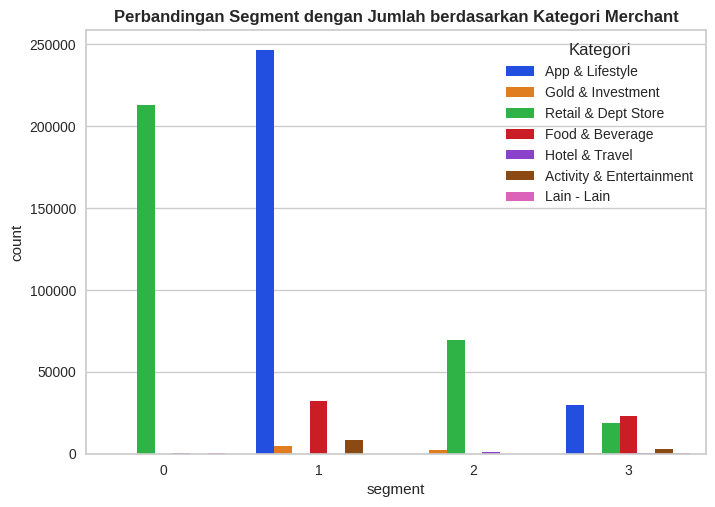

In [ ]:
# Segment vs Count (Kategori Merchant)
sns.countplot(x=results['segment'],hue="Kategori",data=results, palette="bright")
plt.title("Perbandingan Segment dengan Jumlah berdasarkan Kategori Merchant", fontsize=12, weight="bold")

* Cluster 0 : Cluster 0 adalah cluster yang hanya terdapat kategori retail & dept store

* Cluster 1 : Cluster 1 adalah cluster yang terdiri dari App & lifestyle, gold & investment, food & beverage, activity & entertainment dengan kategori paling banyak ada di App & lifestyle dan paling sedikit ada di gold & investment.

* Cluster 2 : Cluster 2 adalah cluster yang terdiri dari gold & investment,retail & dept store, Hotel & Travel dengan kategori pembelian di retail & dept store dan paling sedikit ada di Hotel & Travel.

* Cluster 3 : Cluster 3 adalah cluster yang terdiri dari App & lifestyle, retail & dept store, food & beverage, activity & entertainment dengan kategori paling banyak ada di App & lifestyle dan paling sedikit ada di activity & entertainment.

Text(0.5, 1.0, 'Perbandingan Segment dengan Jumlah berdasarkan Status Transaksi')

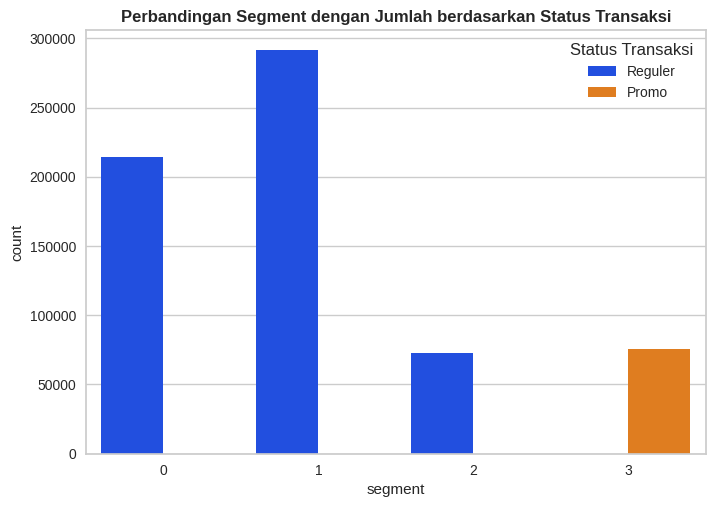

In [ ]:
# Segment vs count (Status Transaksi)
sns.countplot(x=results['segment'], hue="Status Transaksi", data=results, palette="bright")
plt.title("Perbandingan Segment dengan Jumlah berdasarkan Status Transaksi", fontsize=12, weight="bold")

* Cluster 0 : Cluster 0 adalah cluster dengan status transaksi reguler berjumlah sekitar 215.000

* Cluster 1 : Cluster 1 adalah cluster dengan status transaksi reguler berjumlah sekitar 285.000

* Cluster 2 : Cluster 2 adalah cluster dengan status transaksi reguler berjumlah sekitar 70.000

* Cluster 3 : Cluster 3 adalah cluster dengan status transaksi promo berjumlah sekitar 72.000

Text(0.5, 1.0, 'Perbandingan Segment berdasarkan Selling Price dan Amount')

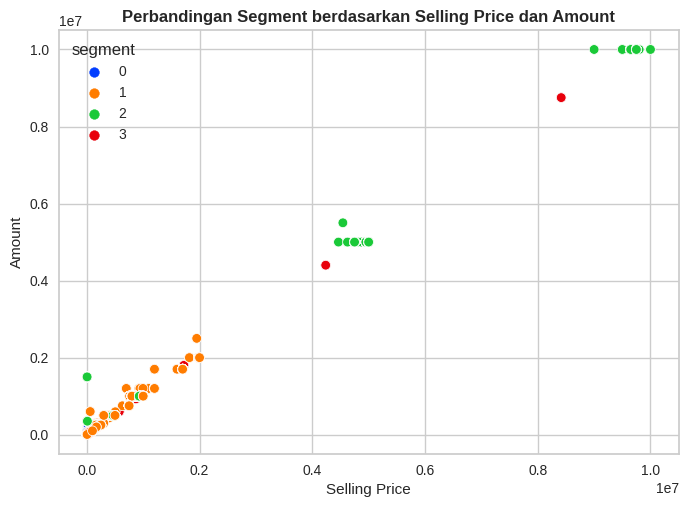

In [ ]:
# Selling Price vs Amount (Segment)
sns.scatterplot(x=results['Selling Price'],y=results['Amount'],hue=results['segment'],data=results,palette='bright')
plt.title("Perbandingan Segment berdasarkan Selling Price dan Amount", fontsize=12, weight="bold")

* Cluster 0 : Cluster 0 adalah cluster dengan selling price dan Amount rendah

* Cluster 1 : Cluster 1 adalah cluster dengan selling price 0 - 2.000.000 dan Amount 0 - 2.500.000

* Cluster 2 :  Cluster 2 adalah cluster dengan selling price 0 - 10.000.000 dan Amount 0 - 10.000.000

* Cluster 3 : Cluster 3 adalah cluster dengan selling price 0 - 8.400.000 dan Amount 0 - 8.700.000

Text(0.5, 1.0, 'Perbandingan Segment dengan Jumlah berdasarkan Status Transaksi')

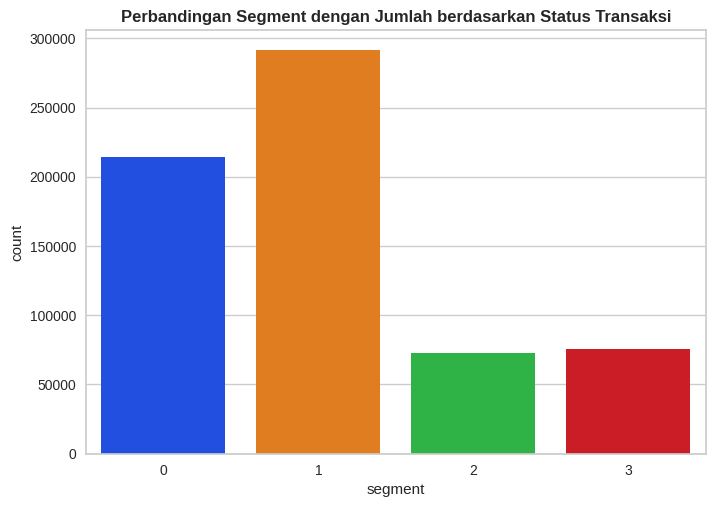

In [ ]:
sns.countplot(x=results['segment'], data=results, palette="bright")
plt.title("Perbandingan Segment dengan Jumlah berdasarkan Status Transaksi", fontsize=12, weight="bold")

## KESIMPULAN

* Cluster 0 adalah Cluster yang memiliki Jumlah Quantity penjualan terbanyak dengan Status regular. Nominal pada cluster ini yaitu antara Low-Medium High dan hanya menjual kategori Retail & Dept Store

* Cluster 1 adalah Cluster yang memiliki Status reguler, kategori yang berada pada cluster ini diantaranya app & lifestyle, gold & investment, food & beverage dan activity & entertainment. nominal pada cluster ini antara low-high end

* Cluster 2 adalah Cluster dengan amount dan selling price tertinggi

* Cluster 3 adalah satu satunya cluster yang status transaksinya promo

### RFM

In [ ]:
#membuat kolom baru dengan type datanya menjadi date
df['DATE'] = pd.DatetimeIndex(df.Date).date

In [ ]:
#ambil data paling terakhir transaksi
import datetime as dt
now = dt.date(2023,6,17)

In [ ]:
#Group by berdasarkan customer terakhir membeli

recency_df = df.groupby(['Nomor Customer'],as_index=False)['DATE'].max()
recency_df.columns = ['Nomor Customer','LastPurchaseDate']
recency_df.head()

,Nomor Customer,LastPurchaseDate
0,0pbvpbv0,2022-02-03
1,0pbvpbv1,2022-08-20
2,0pbvpbv2,2022-06-26
3,0pbvpbv3,2022-08-05
4,0pbvpbv4,2022-08-14


In [ ]:
#hitung seberapa sering dia membeli dengan mengacu pada tanggal terbaru dalam beberapa hari

recency_df['Recency'] = recency_df.LastPurchaseDate.apply(lambda x : (now - x).days)
recency_df.head()

,Nomor Customer,LastPurchaseDate,Recency
0,0pbvpbv0,2022-02-03,499
1,0pbvpbv1,2022-08-20,301
2,0pbvpbv2,2022-06-26,356
3,0pbvpbv3,2022-08-05,316
4,0pbvpbv4,2022-08-14,307


In [ ]:
df['Index'] = range(1, len(df) + 1)
df

,Nomor Transaksi,Status Transaksi,Order At,Date,Merchant ID,Kategori,SKU Product Name,Nomor Customer,Register Date,Amount,...,Total Amount,Total Selling Price,Nominal,month,Bulan,Tanggal,Tanggal Transaksi,Keuntungan_Cust,DATE,Index
0,1.640970e+12,Reguler,2022-01-01 00:02:30,2022-01-01,T675a,App & Lifestyle,Voucher Digital T675a Rp. 500.000,rpbvpbvu,2021-10-16,500000,...,500000,500000,High,01,01,16,01,0,2022-01-01,1
1,1.640970e+12,Reguler,2022-01-01 00:07:05,2022-01-01,T675a,App & Lifestyle,Voucher Digital T675a Rp. 500.000,rpbvpbvu,2021-10-16,500000,...,500000,500000,High,01,01,16,01,0,2022-01-01,2
2,1.640970e+12,Reguler,2022-01-01 00:09:00,2022-01-01,T675a,App & Lifestyle,Voucher Digital T675a Rp. 1.000.000,ipbvpbve,2021-08-02,1000000,...,1000000,1000000,High End,01,01,02,01,0,2022-01-01,3
3,1.640970e+12,Reguler,2022-01-01 00:11:50,2022-01-01,T672672672a,Gold & Investment,Voucher Digital T672672672a Rp. 100.000,rpbvpbvn,2020-09-11,100000,...,100000,99000,Medium,01,01,11,01,1000,2022-01-01,4
4,1.640970e+12,Reguler,2022-01-01 00:11:50,2022-01-01,T672672672a,Gold & Investment,Voucher Digital T672672672a Rp. 1.000.000,rpbvpbvn,2020-09-11,1000000,...,2000000,1980000,High End,01,01,11,01,10000,2022-01-01,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654316,1.672510e+12,Promo,2022-12-31 23:52:14,2022-12-31,A675675675675675s,Food & Beverage,Voucher Digital A675675675675675s Rp. 50.000 -...,ipbvpbv1,2020-10-28,50000,...,50000,30000,Low,12,12,28,31,20000,2022-12-31,654317
654317,1.672510e+12,Promo,2022-12-31 23:52:14,2022-12-31,I675675675675675.,Food & Beverage,Voucher Digital I675675675675675. Rp. 50.000 -...,ipbvpbv1,2020-10-28,50000,...,50000,33000,Low,12,12,28,31,17000,2022-12-31,654318
654318,1.672510e+12,Reguler,2022-12-31 23:54:06,2022-12-31,U675675675675675r,App & Lifestyle,Voucher Digital U675675675675675r Rp. 5.000,apbvpbve,2022-07-30,5000,...,5000,5000,Low,12,12,30,31,0,2022-12-31,654319
654319,1.672510e+12,Reguler,2022-12-31 23:54:24,2022-12-31,C675675675s,Activity & Entertainment,Voucher Digital C675675675s Rp 200.000,dpbvpbv.,2019-08-30,200000,...,200000,170000,Medium High,12,12,30,31,30000,2022-12-31,654320


In [ ]:
#periksa frekuensi pelanggan berarti sudah berapa kali transaksi

frequency_df = df.copy()
frequency_df.drop_duplicates(subset=['Nomor Customer','Index'], keep="first", inplace=True)
frequency_df = frequency_df.groupby('Nomor Customer',as_index=False)['Index'].count()
frequency_df.columns = ['Nomor Customer','Frequency']
frequency_df.head()

,Nomor Customer,Frequency
0,0pbvpbv0,4
1,0pbvpbv1,24
2,0pbvpbv2,43
3,0pbvpbv3,6
4,0pbvpbv4,9


In [ ]:
monetary_df=df.groupby('Nomor Customer',as_index=False)['Total Selling Price'].sum()
monetary_df.columns = ['Nomor Customer','Monetary']
monetary_df.head()

,Nomor Customer,Monetary
0,0pbvpbv0,40000
1,0pbvpbv1,4413000
2,0pbvpbv2,26570000
3,0pbvpbv3,50000
4,0pbvpbv4,4265000


In [ ]:
#combine first recency and frequency
rf = recency_df.merge(frequency_df,left_on='Nomor Customer',right_on='Nomor Customer')

#combine rf frame with monetary values
rfm = rf.merge(monetary_df,left_on='Nomor Customer',right_on='Nomor Customer')
rfm.set_index('Nomor Customer',inplace=True)
rfm.head()

,LastPurchaseDate,Recency,Frequency,Monetary
Nomor Customer,,,,
0pbvpbv0,2022-02-03,499,4,40000
0pbvpbv1,2022-08-20,301,24,4413000
0pbvpbv2,2022-06-26,356,43,26570000
0pbvpbv3,2022-08-05,316,6,50000
0pbvpbv4,2022-08-14,307,9,4265000


In [ ]:
rfm.drop(columns=['LastPurchaseDate'],inplace=True)
rfm.head()

,Recency,Frequency,Monetary
Nomor Customer,,,
0pbvpbv0,499,4,40000
0pbvpbv1,301,24,4413000
0pbvpbv2,356,43,26570000
0pbvpbv3,316,6,50000
0pbvpbv4,307,9,4265000


In [ ]:
quantiles = rfm.quantile(q=[0.25,0.5,0.75])
quantiles

,Recency,Frequency,Monetary
0.25,169.0,6.0,675000.0
0.50,177.0,36.0,8347000.0
0.75,305.5,304.5,107940100.0


In [ ]:
RFMScores= rfm.copy()
#Recency Scoring
def Rscoring(x,p,d):
   if x <= d[p][0.25]:
      return 1
   elif x <= d[p][0.50]:
      return 2
   elif x <= d[p][0.75]:
      return 3
   else:
      return 4
#Frequency and Monetary Scoring
def FMscoring (x,p,d):
   if x <= d[p][0.25]:
      return 4
   elif x <= d[p][0.50]:
      return 3
   elif x <= d[p][0.75]:
      return 2
   else:
      return 1
RFMScores['R']=RFMScores['Recency'].apply(Rscoring, args=('Recency',quantiles))
RFMScores['F']=RFMScores['Frequency'].apply(FMscoring, args=('Frequency',quantiles))
RFMScores['M']=RFMScores['Monetary'].apply(FMscoring, args=('Monetary',quantiles))
RFMScores['RFMgroup']=RFMScores.R.map(str)+RFMScores.F.map(str)+RFMScores.M.map(str)
RFMScores['Score']=RFMScores[['R','F','M']].sum(axis=1)
print(RFMScores.head())

                Recency  Frequency  Monetary  R  F  M RFMgroup  Score
Nomor Customer                                                       
0pbvpbv0            499          4     40000  4  4  4      444     12
0pbvpbv1            301         24   4413000  3  3  3      333      9
0pbvpbv2            356         43  26570000  4  2  2      422      8
0pbvpbv3            316          6     50000  4  4  4      444     12
0pbvpbv4            307          9   4265000  4  3  3      433     10


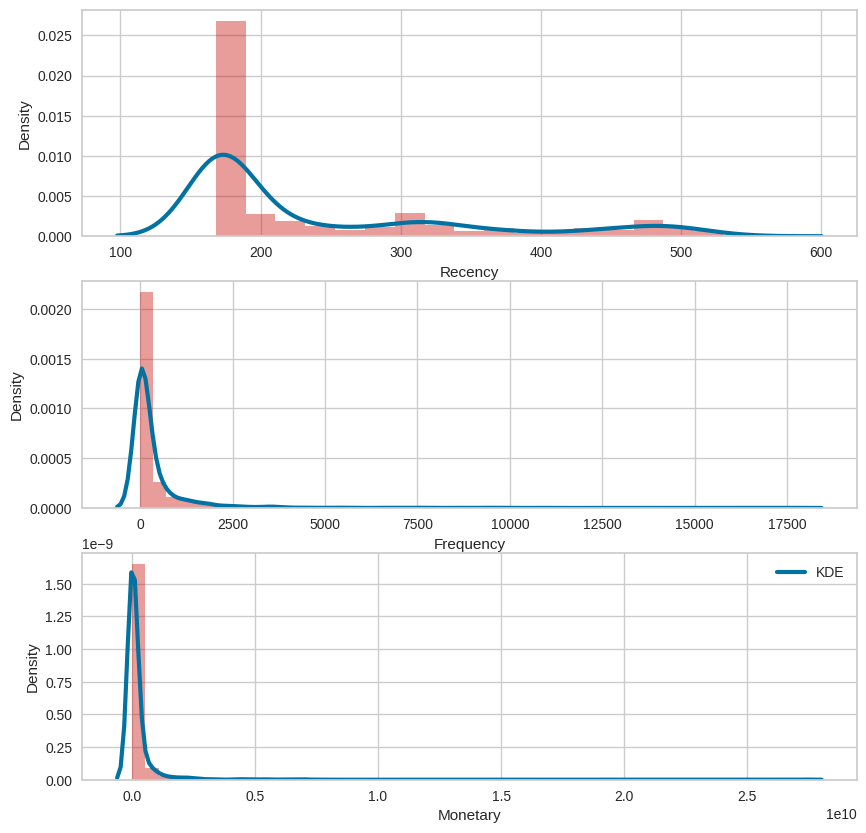

In [ ]:
#Melihat distibusi data hasil RFMScore
plt.figure(figsize=(10,10))
plt.subplot(3,1,1)
sns.distplot(rfm['Recency'],kde_kws={"color":"b","lw":3,"label":"KDE"},hist_kws={"color":"r"})
plt.subplot(3,1,2)
sns.distplot(rfm['Frequency'],kde_kws={"color":"b","lw":3,"label":"KDE"},hist_kws={"color":"r"})
plt.subplot(3,1,3)
sns.distplot(rfm['Monetary'],kde_kws={"color":"b","lw":3,"label":"KDE"},hist_kws={"color":"r"})
plt.legend()
plt.show()

In [ ]:
clustering_rfm = rfm[['Recency',"Frequency","Monetary"]].copy()
clustering_rfm.head()

,Recency,Frequency,Monetary
Nomor Customer,,,
0pbvpbv0,499,4,40000
0pbvpbv1,301,24,4413000
0pbvpbv2,356,43,26570000
0pbvpbv3,316,6,50000
0pbvpbv4,307,9,4265000


In [ ]:
from sklearn .preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(clustering_rfm)
data_scaled = pd.DataFrame(x_scaled,columns=['Recency','Frequency','Monetary'])
data_scaled

,Recency,Frequency,Monetary
0,0.914365,0.000168,0.000001
1,0.367403,0.001292,0.000161
2,0.519337,0.002358,0.000969
3,0.408840,0.000281,0.000002
4,0.383978,0.000449,0.000155
...,...,...,...
1834,0.176796,0.001460,0.000149
1835,0.002762,0.001685,0.000659
1836,0.306630,0.000225,0.000216
1837,0.005525,0.013196,0.002843


Text(0.5, 1.0, 'Elbow plot for optimal number of clusters')

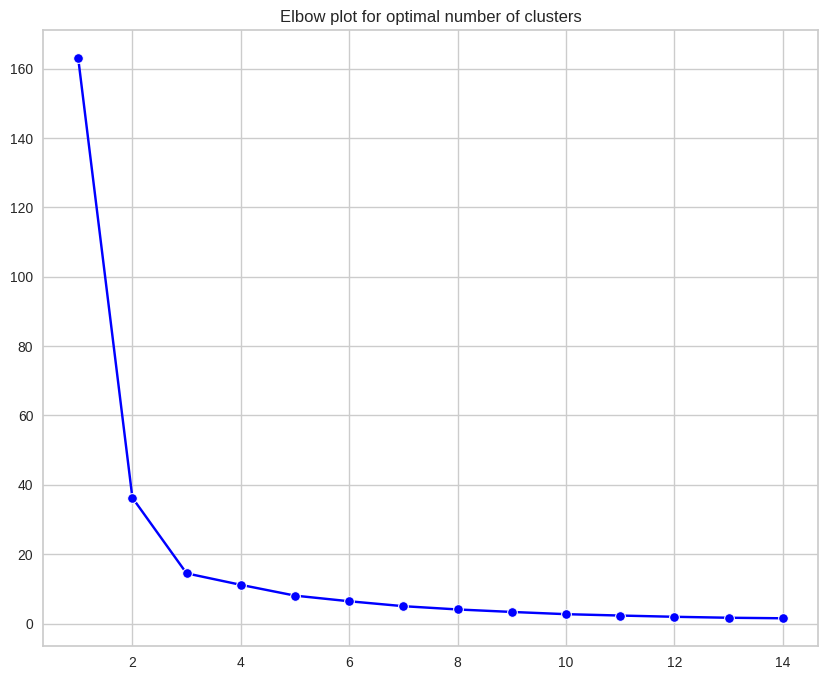

In [ ]:
#mencari number of cluster yang optimal menggunakan method elbow
wscc = []
for i in range(1,15):
    kmeans = KMeans(n_clusters=i, init="k-means++",random_state=0)
    kmeans.fit(data_scaled)
    wscc.append(kmeans.inertia_)

plt.figure(figsize=(10,8))
sns.lineplot(x=range(1,15),y=wscc,marker="o",c='blue')
plt.title("Elbow plot for optimal number of clusters")

In [ ]:
from sklearn.metrics import silhouette_score
#mengecek menggunakan silhoutte_score untuk konfirmasi k-kluster
range_n_clusters = range(2,15)
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters)
    preds = clusterer.fit_predict(data_scaled)
    centers = clusterer.cluster_centers_

    score = silhouette_score(data_scaled, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.7448339218089882
For n_clusters = 3, silhouette score is 0.7523688261209596
For n_clusters = 4, silhouette score is 0.6511090531988569
For n_clusters = 5, silhouette score is 0.6751351345944459
For n_clusters = 6, silhouette score is 0.6512279058818393
For n_clusters = 7, silhouette score is 0.6254804621343769
For n_clusters = 8, silhouette score is 0.6174834354508567
For n_clusters = 9, silhouette score is 0.6196338413002264
For n_clusters = 10, silhouette score is 0.6173201883460399
For n_clusters = 11, silhouette score is 0.5635519454061705
For n_clusters = 12, silhouette score is 0.590872697787767
For n_clusters = 13, silhouette score is 0.5910755183131741
For n_clusters = 14, silhouette score is 0.5790917639813772


In [ ]:
#Clustering dengan mengunakan Kmeans.
kmeans = KMeans(n_clusters=3, random_state=0,init='k-means++',
                n_init =10,max_iter = 300).fit(data_scaled)
pred = kmeans.predict(data_scaled)
RFMScores['Cluster']=kmeans.labels_
RFMScores.head(10)

,Recency,Frequency,Monetary,R,F,M,RFMgroup,Score,Cluster
Nomor Customer,,,,,,,,,
0pbvpbv0,499,4,40000,4,4,4,444,12,2
0pbvpbv1,301,24,4413000,3,3,3,333,9,1
0pbvpbv2,356,43,26570000,4,2,2,422,8,1
0pbvpbv3,316,6,50000,4,4,4,444,12,1
0pbvpbv4,307,9,4265000,4,3,3,433,10,1
0pbvpbv5,361,5,50000,4,4,4,444,12,1
0pbvpbv6,371,5,50000,4,4,4,444,12,1
0pbvpbv7,441,10,912750,4,3,3,433,10,2
0pbvpbv8,440,27,14575000,4,3,2,432,9,2


In [ ]:
#Melihat hasil mean tiap cluster berdasarkan score dan RFM
RFMScores.groupby('Cluster').mean().sort_values('Score',ascending=False)

,Recency,Frequency,Monetary,R,F,M,Score
Cluster,,,,,,,
2,472.004255,4.782979,9.169955e+05,4.000000,3.800000,3.719149,11.519149
1,316.785714,11.187500,5.283827e+06,3.669643,3.535714,3.502976,10.708333
0,178.574921,512.175079,3.099831e+08,1.850158,2.001577,2.009464,5.861199


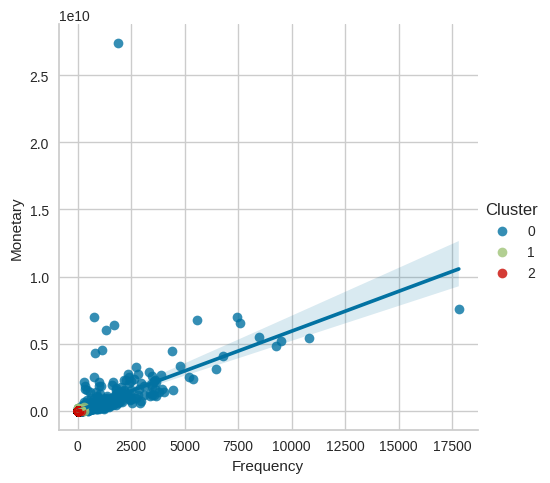

In [ ]:
#perbandingan frequency dengan monetary
sns.lmplot(x='Frequency', y='Monetary', data=RFMScores, hue='Cluster')

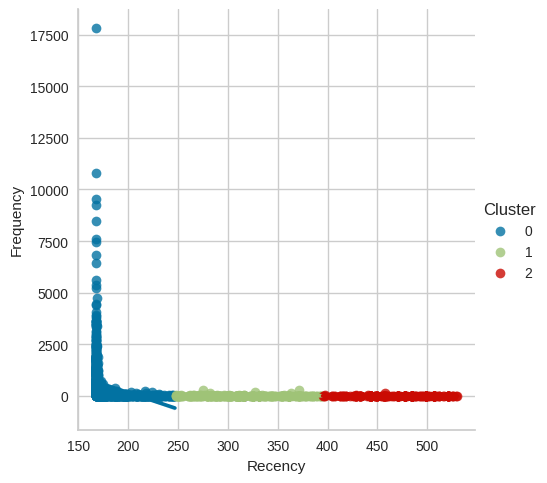

In [ ]:
#perbandingan Recency dengan frequency
sns.lmplot(x='Recency', y='Frequency', data=RFMScores, hue='Cluster', fit_reg=True)

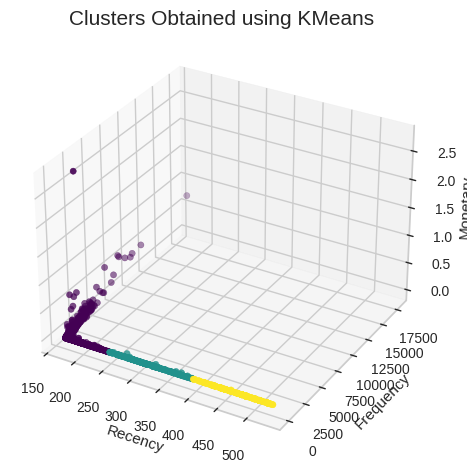

In [ ]:
#melihat hasil 3D persebaran cluster menggunakan kmeans
p=RFMScores['Recency']
q=RFMScores['Frequency']
r=RFMScores['Monetary']

ax= plt.axes(projection='3d')

ax.scatter3D(p, q, r , c=RFMScores['Cluster'],cmap='viridis')
plt.title('Clusters Obtained using KMeans',fontsize=15)
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.show()

## SARAN CLUSTERING

* Segment 0 : Memberikan promo pada pembelian  dengan quantity > 75.
Ex: untuk pembelian voucher lebih dari 75 dalam satu kali transaksi akan mendapatkan diskon voucher sekitar 5% - 10%.


* Segment 1 : Memberikan promo berupa bundling pada setiap pembelian voucher berkategori App & Lifestyle.
Ex: Setiap customer pada segment 1 yang membeli voucher berkategori App & Lifestyle akan mendapatkan tambahan promo bundling ketika membeli satu voucher atau lebih pada kategori lainnya.

* Segment 2 : Menyajikan jenis jenis voucher berkategori luxury untuk meningkatkan spending dari segment 2.
Ex: Merekomendasikan voucher luxury pada halaman utama customer  jika sesuai dengan algoritma pembelian customer pada segment 2.

* Segment 3 : Menyediakan lebih banyak voucher berkategori promo dengan selling price bersyarat.
Ex: Promo akan diberikan apabila selling price lebih dari harga pembelian sebelumnya.

## SARAN RFM

* Cluster 0 : Tingkat rfm cluster 0 telah maksimal.
* Cluster 1 : Memberikan promo berupa diskon yang diharapkan akan meningkatkan monetary.
* Cluster 2 : Memberikan cashback dengan tujuan menurunkan recency.
Ex : Ketika cashback tidak dipakai dalam x hari maka cashback akan hangus.


## SARAN KESELURUHAN

**Saran keseluruhan:**

* Menambah varians merchant untuk kategori-kategori yang masih sedikit jumlah penjualannya seperti Gold & Investment, Activity & Entertainment, Hotel & Travel, dan Lain-lain.

* Menambahkan Sistem PayLater karena masih banyak yang memiliki monetary rendah untuk meningkatkan penjualan.

* Ketika di akhir transaksi mengadakan survei untuk user terkait perkembangan aplikasi.

* Mengadakan promosi secara digital dan berkolaborasi dengan publik figur agar demand dari aplikasi meningkat.
